In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

# 데이터프레임만 입력하면 

# 모든 컬럼을 그리는 함수를 만들겠다.

In [2]:
def callgraph(x,y,z):
    fig = plt.figure(figsize=(10,5))
    sns.lmplot(data=z, x=x, y=y, order=3,\
           scatter_kws={'alpha':0.3, 'color':'y'} )

In [3]:
def callgraph1(x,y,z):
    fig = plt.figure(figsize=(20,20))
    sns.lmplot(data=z, x=x, y=y, order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [4]:
def graph(z):
    callgraph('Age','Wage',z)
    callgraph('InternationalReputation','Wage',z)
    fig = plt.figure(figsize=(10,5))
    z.plot(kind='scatter',x='PositionClass',y='Wage',alpha=0.4)
    callgraph1('RealFace','Wage',z)
    callgraph1('LoanedFrom','Wage',z)
    callgraph('Value','Wage',z)
    callgraph('Overall','Wage',z)
    callgraph('Potential','Wage',z)

# 클럽의 정보를 알려주는 함수

In [5]:
def check(x):
    print('{}의 인원: '.format(x.Club.values[0]), x.shape[0])
    x = x.sort_values(by='Wage', ascending=False)
    print(x[['Wage']].describe())
    print('=========================================')
    x = x.sort_values(by='Overall', ascending=False)
    print(x[['Overall']].describe())
    print('=========================================')
    x = x.sort_values(by='Potential', ascending=False)
    print(x[['Potential']].describe())
    print('=========================================')
    x = x.sort_values(by='Value', ascending=False)
    print(x[['Value']].describe())
    print('=========================================')
    return x

# 축구팀마다의 Wage의 특성을 살펴보자.

# 

In [6]:
dfWeight = pd.read_pickle('./dataset/나혼자FIFA_사전정리.pkl')
dfWeight

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin
0,73450,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500
1,54600,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
2,49400,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
3,46150,173731,G. Bale,28,Wales,88,88,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
4,46150,182521,T. Kroos,28,Germany,90,90,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,65,Atlético Huila,61750.0,1759,Left,1.0,3.0,2.0,6,Normal,0,LB,24.0,"Aug 7, 2018",0,2023,175.0,78,59,59,59,60,59,59,59,60,59,59,59,63,60,60,60,63,65,64,64,64,65,65,64,64,64,65,62.0,45.0,60.0,62.0,38.0,58.0,64.0,66.0,59.0,60.0,75.0,76.0,67.0,63.0,61.0,66.0,63.0,77.0,74.0,32.0,68.0,61.0,50.0,57.0,49.0,52.0,60.0,60.0,58.0,12.0,16.0,15.0,9.0,16.0

In [7]:
ClubMeanWageOrder = pd.read_pickle('./dataset/나혼자FIFA_ClubMeanWageOrder.pkl')
ClubMeanWageOrder.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650
Club,Real Madrid,FC Barcelona,Manchester City,Juventus,Manchester United,Liverpool,Chelsea,Tottenham Hotspur,FC Bayern München,Arsenal,Napoli,Paris Saint-Germain,Milan,Everton,Inter,Roma,West Ham United,Atlético Madrid,Beşiktaş JK,Leicester City,Olympique Lyonnais,Bayer 04 Leverkusen,Borussia Dortmund,Lazio,Fenerbahçe SK,Fiorentina,Watford,Wolverhampton Wanderers,Southampton,Olympique de Marseille,AS Monaco,Bournemouth,Sassuolo,Burnley,Galatasaray SK,Crystal Palace,RB Leipzig,Torino,Brighton & Hove Albion,Club América,Newcastle United,Fulham,Valencia CF,Stoke City,Tigres U.A.N.L.,Atlético Mineiro,Celtic,VfL Wolfsburg,Nottingham Forest,Villarreal CF,Sampdoria,Real Sociedad,Cagliari,Cardiff City,Bologna,Middlesbrough,FC Girondins de Bordeaux,TSG 1899 Hoffenheim,FC Schalke 04,Girona FC,Grêmio,VfB Stuttgart,Eintracht Frankfurt,Parma,Atalanta,Huddersfield Town,Rangers FC,Real Betis,Derby County,Monterrey,Medipol Başakşehir FK,Leeds United,SD Eibar,Internacional,OGC Nice,Cruzeiro,Borussia Mönchengladbach,CD Leganés,AS Saint-Étienne,Sevilla FC,Hannover 96,Stade Rennais FC,Deportivo Alavés,Fluminense,Getafe CF,Boca Juniors,Levante UD,West Bromwich Albion,Hertha BSC,Bristol City,Guangzhou Evergrande Taobao FC,Al Hilal,RC Celta,SV Werder Bremen,Wigan Athletic,Athletic Club de Bilbao,RCD Espanyol,FC Nantes,Trabzonspor,Aston Villa,1. FSV Mainz 05,Guadalajara,FC Red Bull Salzburg,Toulouse Football Club,Udinese,Sporting CP,FC Porto,Montpellier HSC,Al Nassr,Brentford,Independiente,LOSC Lille,En 

651개의 프로팀 중에 무려

651 - 618 = 33개 팀이 어떤 능력치에도 상관없이 최소주급만 준다.

618~650까진 모든 선수가 최하만 받는다...

# 최상위 팀

# 1. Real Madrid
- PositionClass는 잘 안 맞는다.
- LoanedFrom 해당사항 없다.

In [8]:
Real = pd.read_pickle('./FifaClub/Real Madrid.pkl')
check(Real)

Real Madrid의 인원:  26
               Wage
count     26.000000
mean   20335.000000
std    17520.534524
min     1170.000000
25%     3185.000000
50%    16575.000000
75%    31200.000000
max    54600.000000
         Overall
count  26.000000
mean   78.076923
std    10.522065
min    62.000000
25%    66.250000
50%    80.000000
75%    87.750000
max    91.000000
       Potential
count  26.000000
mean   84.923077
std     5.959349
min    71.000000
25%    80.000000
50%    87.000000
75%    90.000000
max    92.000000
              Value
count  2.600000e+01
mean   3.608625e+06
std    3.372506e+06
min    4.550000e+04
25%    1.560000e+05
50%    2.502500e+06
75%    6.597500e+06
max    9.945000e+06


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
4,46150,182521,T. Kroos,28,Germany,90,90,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.0,99.20148,16575.0,97.157111,1170.0,70.656134,420
7,40950,197781,Isco,26,Spain,88,91,Real Madrid,9555000.0,2137,Right,3.0,3.0,4.0,2,Normal,1,LW,22.0,"Jul 3, 2013",0,2022,172.5,79,79,79,79,87,86,86,86,87,89,89,89,86,86,86,86,86,75,76,76,76,75,71,66,66,66,71,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,20306000.0,16.072575,3.0,Foward,106.201315,20335.0,99.20148,16575.0,97.157111,1170.0,70.656134,420
1,54600,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.0,99.20148,16575.0,97.157111,1170.0,70.656134,420
3,46150,173731,G. Bale,28,Wales,88,88,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739,20335.0,99.20148,16575.0,97.157111,1170.0,70.656134,420
28,27950,220834,Marco Asensio,22,Spain,85,92,Real Madrid,7020000.0,2050,Left,3.0,3.0,4.0,2,Normal,1,RW,10.0,"Jul 1, 2015",0,2023,180.0,76,82,82,82,86,86,86,86,86,86,86,86,86,82,82,82,86,69,66,66,66,69,65,54,54,54,65,82.0,82.0,50.0,83.0,79.0,86.0,83.0,76.0,82.0,85.0,85.0,82.0,79.0,82.0,76.0,86.0,58.0,76.0,61.0,88.0,45.0,45.0,82.0,84.0,62.0,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,15795000.0,15.764274,4.5,Foward,102.382083,20335.0,99.20148,16575.0,97.157111,1170.0,70.656134,420
21,31200,192119,T. Courtois,26,Belgium,89,90,Real Madrid,6955000.0,1311,Left,4.0,2.0,1.0,6,Courtois,1,GK,1.0,"Aug 9, 2018",0,2024,195.0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,14781000.0,15.754972,3.5,GoalKeeper,103.482054,20335.0,99.20148,16575.0,97.157111,1170.0,70.656134,420
2,49400,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,5

<Figure size 720x360 with 0 Axes>

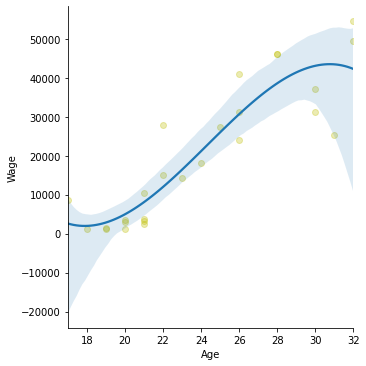

<Figure size 720x360 with 0 Axes>

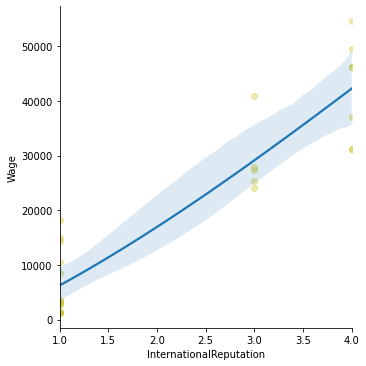

<Figure size 720x360 with 0 Axes>

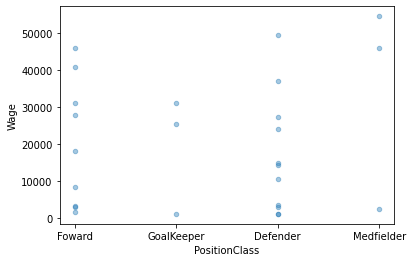

<Figure size 1440x1440 with 0 Axes>

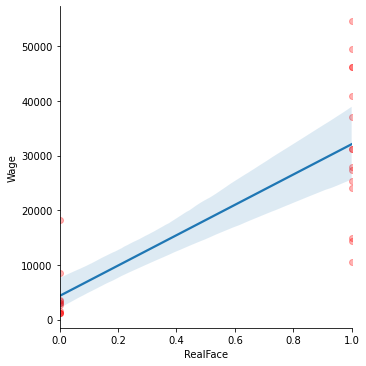

<Figure size 1440x1440 with 0 Axes>

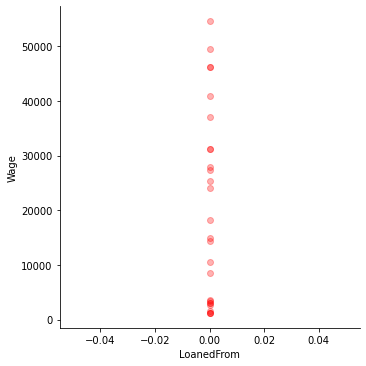

<Figure size 720x360 with 0 Axes>

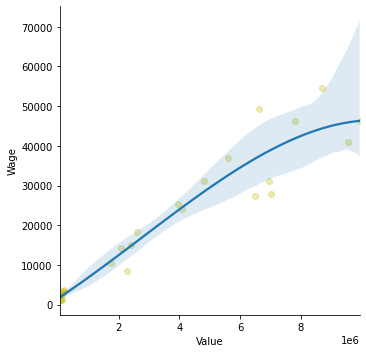

<Figure size 720x360 with 0 Axes>

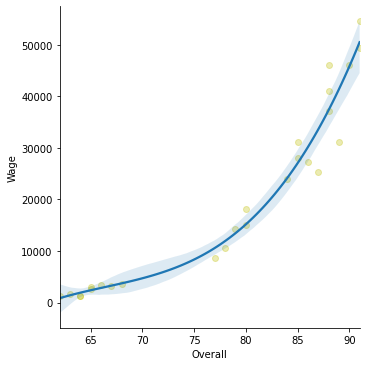

<Figure size 720x360 with 0 Axes>

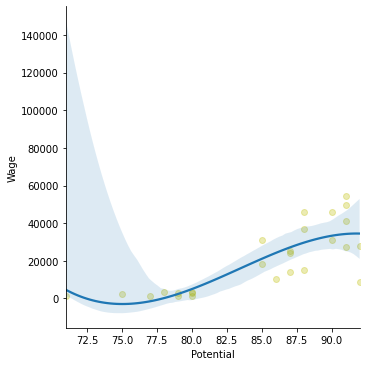

In [9]:
graph(Real)

# 3. Barcelona
- PositionClass는 잘 안 맞는다.
- LoanedFrom 역시 없다.

In [10]:
Barcelona = pd.read_pickle('./FifaClub/FC Barcelona.pkl')
check(Barcelona)

FC Barcelona의 인원:  25
               Wage
count     25.000000
mean   17654.000000
std    16743.609726
min      520.000000
25%     2730.000000
50%    16250.000000
75%    26650.000000
max    73450.000000
         Overall
count  25.000000
mean   77.400000
std     9.639329
min    61.000000
25%    69.000000
50%    81.000000
75%    85.000000
max    94.000000
       Potential
count  25.000000
mean   85.040000
std     5.143604
min    75.000000
25%    81.000000
50%    86.000000
75%    89.000000
max    94.000000
              Value
count  2.500000e+01
mean   3.112850e+06
std    3.451523e+06
min    5.850000e+04
25%    2.080000e+05
50%    2.600000e+06
75%    4.940000e+06
max    1.436500e+07


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
0,73450,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738,17654.0,97.787743,16250.0,96.959097,520.0,62.5575,565
22,31200,192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,7540000.0,1328,Right,3.0,4.0,1.0,6,Normal,1,GK,22.0,"Jul 1, 2014",0,2022,185.0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,16029000.0,15.835733,4.0,GoalKeeper,103.482054,17654.0,97.787743,16250.0,96.959097,520.0,62.5575,565
35,26650,205600,S. Umtiti,24,France,87,92,FC Barcelona,7410000.0,2147,Left,3.0,3.0,2.0,3,Normal,1,CB,23.0,"Jul 12, 2016",0,2023,180.0,75,73,73,73,72,72,72,72,72,72,72,72,73,76,76,76,73,83,84,84,84,83,84,87,87,87,84,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,77.0,71.0,73.0,68.0,82.0,66.0,83.0,89.0,78.0,84.0,74.0,81.0,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,15743000.0,15.818341,4.5,Defender,101.905820,17654.0,97.787743,16250.0,96.959097,520.0,62.5575,565
8,40950,189511,Sergio Busquets,29,Spain,89,89,FC Barcelona,6695000.0,2065,Right,4.0,3.0,3.0,6,Lean,1,CDM,5.0,"Sep 1, 2008",0,2023,185.0,76,74,74,74,77,79,79,79,77,82,82,82,79,86,86,86,79,82,89,89,89,82,81,85,85,85,81,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,13728000.0,15.716872,3.0,Defender,106.201315,17654.0,97.787743,16250.0,96.959097,520.0,62.5575,565
15,33800,168651,I. Rakitić,30,Croatia,87,87,FC Barcelona,6045000.0,2184,Right,4.0,3.0,3.0,1,Normal,1,RCM,4.0,"Jul 1, 2014",0,2021,180.0,78,80,80,80,83,84,84,84,83,85,85,85,84,87,87,87,84,80,82,82,82,80,78,73,73,73,78,84.0,83.0,58.0,87.0,80.0,84.0,88.0,84.0,90.0,87.0,66.0,59.0,72.0,77.0,66.0,84.0,39.0,84.0,66.0,90.0,67.0,75.0,79.0,86.0,82.0,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,12389000.0,15.614742,3.0,Medfielder,104.282457,17654.0,97.787743,16250.0,96.959097,520.0,62.5575,565
67,20150,231443,O. Dembélé,21,France,83,92,FC Barcelona,5200000.0,1993,Left,3.0,5.0,4.0,5,Lean,1,RW,11.0,"Aug 28, 2017",0,2022,175.0,67,79,79,79,86,85,85,85,86,85,85,85,85,77,77,77,85,66,61,61,61,66,62,49,49,49,62,78.0,78.0,43.0,78.0,76.0,90.0,78.0,64.0,70.0,83.0,93.0,92.0,90.0,82.0,85.0,83.0,59.0,73.0,46.0,70.0,54.0,36.0,79.0,84.0,75.0,75.0,42.0,30.0,33.0,6.0,6.0,14.0,10.0,13.0,11700000.0,15.464169,6.5,Foward,99.110092,17654.0,97.787743,16250.0,96.959097,520.0,62.5575,565
18,32500,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,4940000.0,2230,Left,3.0,3.0,3.0,2,Normal,1,LB,18.0,"Jul 1, 2012",0,2020,167.5,68,79,79,79,84,82,82,82,84,82,82,82,85,82,82,82,85,87,83,83,83,87,87,81,81,81,87,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,93.0,93.0,90.0,83.0,85.0,64.0,81.0,9

<Figure size 720x360 with 0 Axes>

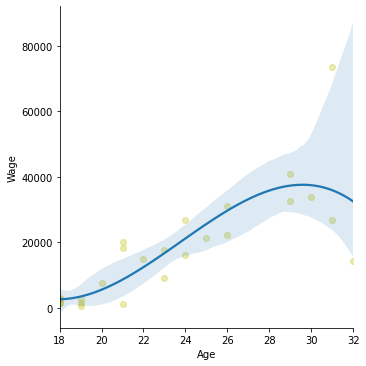

<Figure size 720x360 with 0 Axes>

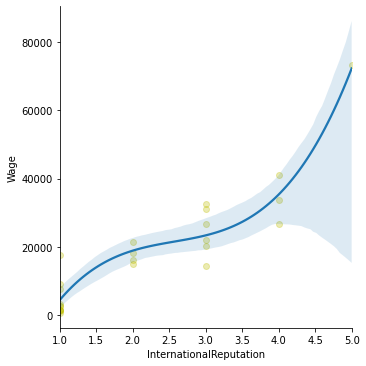

<Figure size 720x360 with 0 Axes>

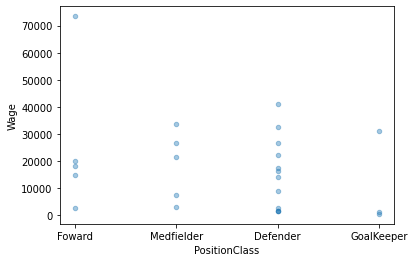

<Figure size 1440x1440 with 0 Axes>

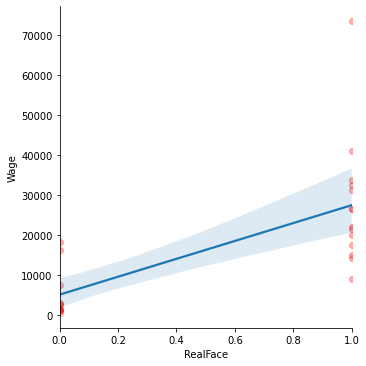

<Figure size 1440x1440 with 0 Axes>

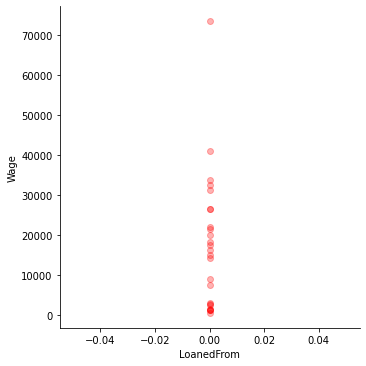

<Figure size 720x360 with 0 Axes>

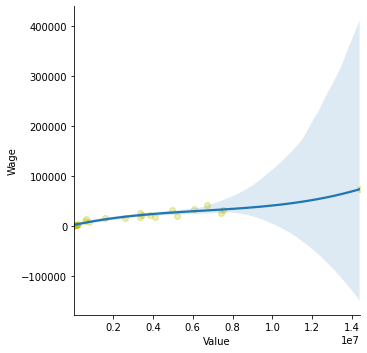

<Figure size 720x360 with 0 Axes>

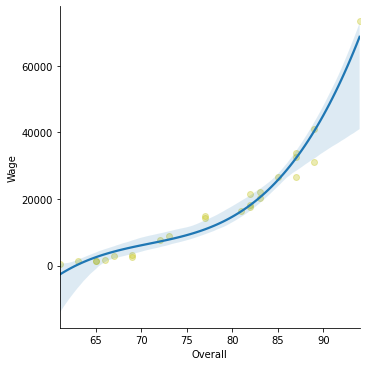

<Figure size 720x360 with 0 Axes>

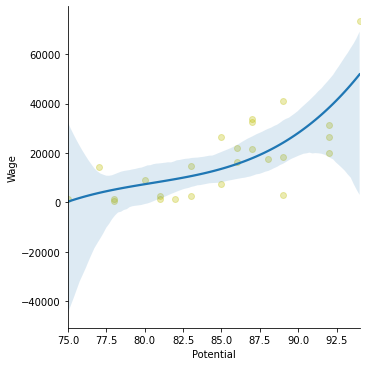

In [11]:
graph(Barcelona)

# 4. Manchester City

In [12]:
ManchesterCity = pd.read_pickle('./FifaClub/Manchester City.pkl')
check(ManchesterCity)

Manchester City의 인원:  25
               Wage
count     25.000000
mean   16088.800000
std    12840.216548
min      780.000000
25%     4680.000000
50%    15600.000000
75%    23400.000000
max    46150.000000
         Overall
count  25.000000
mean   77.840000
std    10.542296
min    54.000000
25%    71.000000
50%    81.000000
75%    86.000000
max    91.000000
       Potential
count  25.000000
mean   83.960000
std     5.877074
min    68.000000
25%    80.000000
50%    85.000000
75%    89.000000
max    92.000000
              Value
count  2.500000e+01
mean   3.479216e+06
std    3.574397e+06
min    1.560000e+04
25%    3.120000e+05
50%    2.600000e+06
75%    5.395000e+06
max    1.326000e+07


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
5,46150,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,13260000.0,2281,Right,4.0,5.0,4.0,1,Normal,1,RCM,7.0,"Aug 30, 2015",0,2023,177.5,70,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,25532000.0,16.400263,5.0,Medfielder,107.396739,16088.8,96.859408,15600.0,96.550903,780.0,66.605751,355
10,39000,153079,S. Agüero,30,Argentina,89,89,Manchester City,8385000.0,2107,Right,4.0,4.0,4.0,2,Stocky,1,ST,10.0,"Jul 28, 2011",0,2021,170.0,70,89,89,89,89,90,90,90,89,88,88,88,86,79,79,79,86,61,59,59,59,61,56,50,50,50,56,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,15509000.0,15.941955,4.0,Foward,105.713426,16088.8,96.859408,15600.0,96.550903,780.0,66.605751,355
38,25350,222492,L. Sané,22,Germany,86,92,Manchester City,7930000.0,2090,Left,2.0,3.0,4.0,2,Lean,1,LW,19.0,"Aug 2, 2016",0,2021,180.0,75,84,84,84,86,86,86,86,86,84,84,84,85,76,76,76,85,67,61,61,61,67,63,54,54,54,63,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,16263000.0,15.886164,4.5,Foward,101.405735,16088.8,96.859408,15600.0,96.550903,780.0,66.605751,355
12,37050,168542,David Silva,32,Spain,90,90,Manchester City,7800000.0,2115,Left,4.0,2.0,4.0,2,Normal,1,LCM,21.0,"Jul 14, 2010",0,2020,170.0,67,80,80,80,88,87,87,87,88,90,90,90,88,88,88,88,88,72,73,73,73,72,67,60,60,60,67,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,14430000.0,15.869634,3.5,Medfielder,105.200506,16088.8,96.859408,15600.0,96.550903,780.0,66.605751,355
44,23400,218667,Bernardo Silva,23,Portugal,86,91,Manchester City,7735000.0,2039,Left,2.0,3.0,4.0,2,Lean,1,RW,11.0,"Jul 1, 2017",0,2022,170.0,64,77,77,77,86,84,84,84,86,86,86,86,86,82,82,82,86,70,67,67,67,70,65,55,55,55,65,85.0,75.0,51.0,85.0,69.0,92.0,83.0,67.0,79.0,91.0,84.0,74.0,90.0,82.0,88.0,70.0,50.0,78.0,48.0,72.0,58.0,49.0,83.0,86.0,68.0,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,14885000.0,15.861266,4.5,Foward,100.605340,16088.8,96.859408,15600.0,96.550903,780.0,66.605751,355
37,25350,202652,R. Sterling,23,England,86,89,Manchester City,7345000.0,2036,Right,3.0,3.0,4.0,2,Lean,1,RW,10.0,"Jul 14, 2015",0,2023,167.5,69,79,79,79,87,86,86,86,87,86,86,86,87,80,80,80,87,72,66,66,66,72,69,55,55,55,69,77.0,77.0,38.0,84.0,67.0,88.0,70.0,63.0,69.0,87.0,95.0,92.0,93.0,87.0,93.0,73.0,57.0,78.0,52.0,73.0,38.0,30.0,87.0,77.0,69.0,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,14144000.0,15.809531,3.0,Foward,101.405735,16088.8,96.859408,15600.0,96.550903,780.0,66.605751,355
100,16250,210257,Ederson,24,Brazil,86,90,Manchester City,5395000.0,1463,Left,2.0,3.0,1.0,6,Normal,1,GK,31.0,"Jul 1, 2017",0,2025,185.0,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.0,14.0,14.0,56.0,18.0,23.0,15.0,20.0,58.0,37.0,64.0

<Figure size 720x360 with 0 Axes>

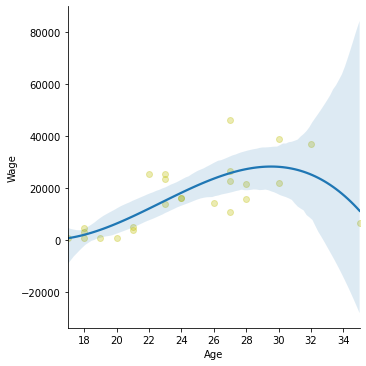

<Figure size 720x360 with 0 Axes>

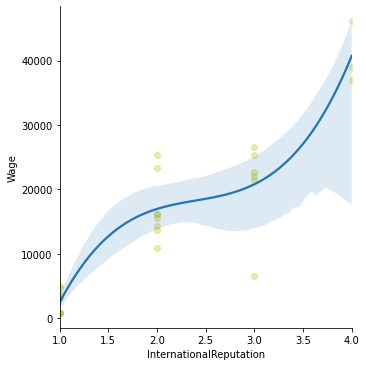

<Figure size 720x360 with 0 Axes>

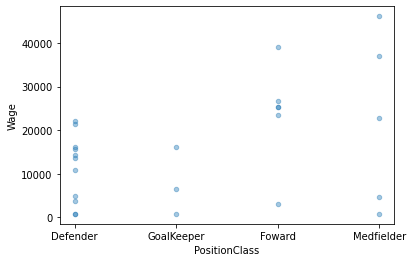

<Figure size 1440x1440 with 0 Axes>

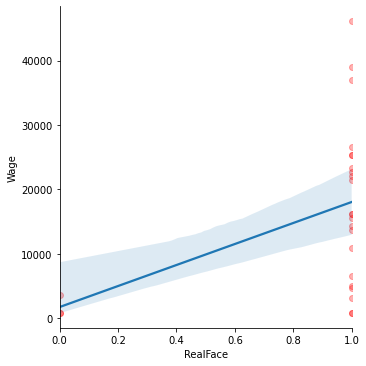

<Figure size 1440x1440 with 0 Axes>

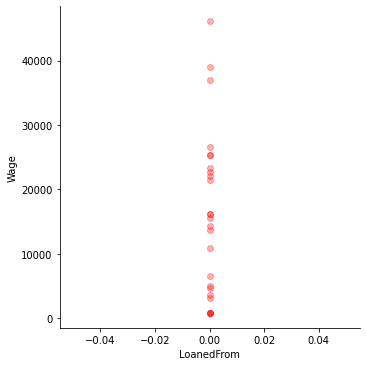

<Figure size 720x360 with 0 Axes>

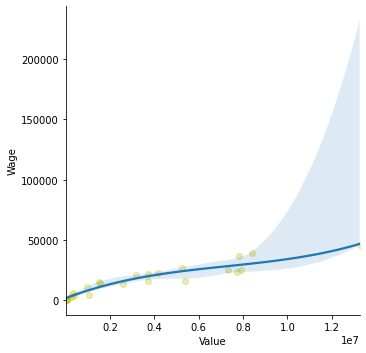

<Figure size 720x360 with 0 Axes>

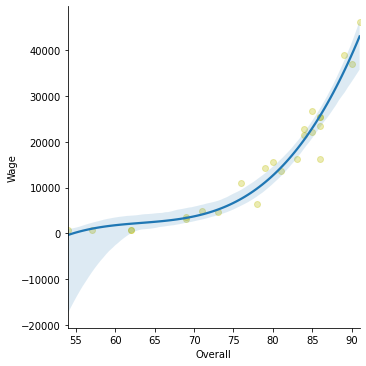

<Figure size 720x360 with 0 Axes>

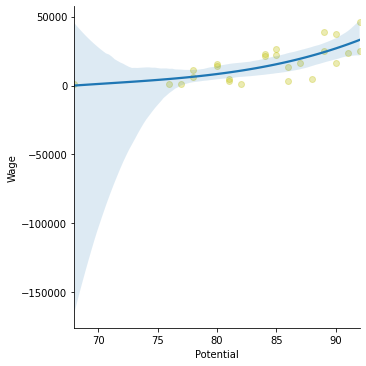

In [13]:
graph(ManchesterCity)

# 상상상상위 팀

# 5. Borussia Dortmund

In [14]:
BorussiaDortmund = pd.read_pickle('./FifaClub/Borussia Dortmund.pkl')
check(BorussiaDortmund)

Borussia Dortmund의 인원:  26
               Wage
count     26.000000
mean    5245.000000
std     3328.597603
min      390.000000
25%     2470.000000
50%     5590.000000
75%     7605.000000
max    13000.000000
         Overall
count  26.000000
mean   75.653846
std     8.475576
min    57.000000
25%    75.250000
50%    79.000000
75%    81.000000
max    86.000000
       Potential
count  26.000000
mean   82.192308
std     4.223925
min    73.000000
25%    79.000000
50%    83.500000
75%    85.750000
max    89.000000
              Value
count  2.600000e+01
mean   1.763725e+06
std    1.330186e+06
min    2.860000e+04
25%    9.262500e+05
50%    1.755000e+06
75%    2.535000e+06
max    5.655000e+06


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
148,13000,188350,M. Reus,29,Germany,86,86,Borussia Dortmund,5655000.0,2172,Right,4.0,4.0,4.0,2,Lean,1,LM,11.0,"Jul 1, 2012",0,2023,177.5,71,85,85,85,88,88,88,88,88,88,88,88,87,82,82,82,87,71,67,67,67,71,67,57,57,57,67,79.0,87.0,49.0,86.0,90.0,87.0,89.0,84.0,75.0,86.0,86.0,85.0,86.0,87.0,81.0,88.0,70.0,73.0,67.0,86.0,49.0,50.0,88.0,86.0,89.0,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,9620000.0,15.548051,4.0,Medfielder,94.727816,5245.0,85.652212,5590.0,86.289134,390.0,59.687076,100
282,8710,192318,M. Götze,26,Germany,82,85,Borussia Dortmund,3510000.0,2101,Right,4.0,4.0,4.0,6,Normal,1,CM,10.0,"Aug 1, 2016",0,2020,172.5,75,78,78,78,83,83,83,83,83,85,85,85,84,84,84,84,84,75,75,75,75,75,71,66,66,66,71,78.0,75.0,51.0,87.0,86.0,84.0,81.0,72.0,82.0,90.0,74.0,64.0,86.0,84.0,85.0,68.0,58.0,73.0,68.0,66.0,58.0,65.0,81.0,86.0,77.0,85.0,63.0,53.0,57.0,14.0,7.0,12.0,6.0,10.0,6227000.0,15.071127,4.0,Medfielder,90.723419,5245.0,85.652212,5590.0,86.289134,390.0,59.687076,100
229,10010,177413,A. Witsel,29,Belgium,84,84,Borussia Dortmund,3120000.0,2200,Right,3.0,4.0,4.0,6,Lean,0,LCM,6.0,"Aug 17, 2018",0,2022,185.0,81,80,80,80,80,81,81,81,80,82,82,82,81,84,84,84,81,83,85,85,85,83,83,84,84,84,83,69.0,71.0,80.0,89.0,77.0,78.0,69.0,68.0,79.0,84.0,67.0,74.0,78.0,84.0,60.0,78.0,76.0,86.0,82.0,74.0,82.0,80.0,75.0,79.0,81.0,89.0,80.0,79.0,85.0,5.0,7.0,7.0,10.0,7.0,5304000.0,14.953344,4.0,Medfielder,92.114398,5245.0,85.652212,5590.0,86.289134,390.0,59.687076,100
399,7020,209889,R. Guerreiro,24,Portugal,81,86,Borussia Dortmund,3120000.0,2146,Left,3.0,3.0,4.0,6,Normal,0,LM,13.0,"Jul 1, 2016",0,2020,167.5,71,77,77,77,83,82,82,82,83,83,83,83,83,82,82,82,83,81,79,79,79,81,79,72,72,72,79,85.0,75.0,52.0,84.0,78.0,83.0,84.0,82.0,75.0,84.0,82.0,68.0,88.0,83.0,86.0,79.0,63.0,72.0,49.0,82.0,69.0,84.0,77.0,79.0,44.0,75.0,67.0,70.0,77.0,12.0,6.0,8.0,11.0,8.0,5538000.0,14.953344,4.5,Medfielder,88.566609,5245.0,85.652212,5590.0,86.289134,390.0,59.687076,100
350,7670,200454,Paco Alcácer,24,Spain,81,85,Borussia Dortmund,3055000.0,1948,Right,2.0,4.0,3.0,2,Normal,1,ST,9.0,"Nov 23, 2018",0,2023,172.5,72,82,82,82,79,81,81,81,79,78,78,78,76,69,69,69,76,58,55,55,55,58,55,51,51,51,55,53.0,85.0,77.0,76.0,84.0,78.0,78.0,63.0,51.0,81.0,82.0,80.0,83.0,84.0,84.0,80.0,75.0,65.0,64.0,68.0,59.0,26.0,86.0,65.0,71.0,82.0,50.0,21.0,26.0,12.0,14.0,14.0,8.0,5.0,5421000.0,14.932290,4.0,Foward,89.452023,5245.0,85.652212,5590.0,86.289134,390.0,59.687076,100
331,7930,193283,T. Delaney,26,Denmark,82,83,Borussia Dortmund,2795000.0,2211,Left,2.0,4.0,3.0,1,Normal,0,LCM,8.0,"Jul 1, 2018",0,2022,180.0,79,78,78,78,76,78,78,78,76,78,78,78,78,80,80,80,78,81,82,82,82,81,82,83,83,83,82,67.0,72.0,83.0,79.0,66.0,73.0,71.0,68.0,77.0,77.0,76.0,78.0,73.0,81.0,74.0,78.0,91.0,90.0,79.0,74.0,84.0,85.0,75.0,77.0,60.0,81.0,80.0,82.0,81.0,8.0,12.0,11.0,14.0,15.0,4966000.0,14.843343,5.5,Medfielder,89.785344,5245.0,85.652212,5590.0,86.289134,390.0,59.687076,100
470,6500,218339,M. Dahoud,22,Germany,80,86,Borussia Dortmund,2600000.0,2052,Right,2.0,4.0,4.0,1,Lean,0,CM,19.0,"Jul 1, 2017",0,2022,175.0,68,71,71,71,78,77,77,77,78,80,80,80,79,81,81,81,79,76,77,77,77,76,73,68,68,68,73,67.0,60.0,43.0,83.0,59.0,85.0,68.

<Figure size 720x360 with 0 Axes>

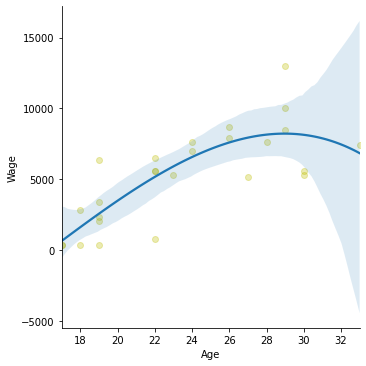

<Figure size 720x360 with 0 Axes>

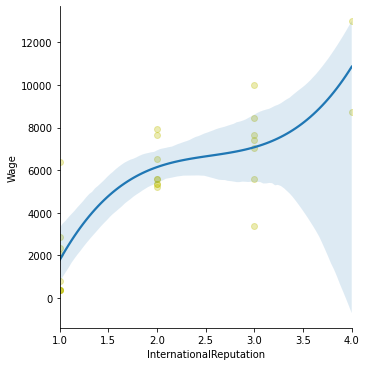

<Figure size 720x360 with 0 Axes>

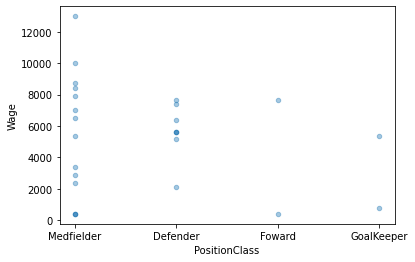

<Figure size 1440x1440 with 0 Axes>

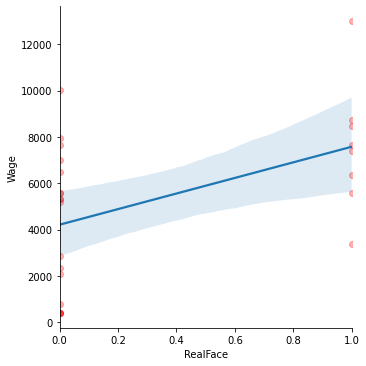

<Figure size 1440x1440 with 0 Axes>

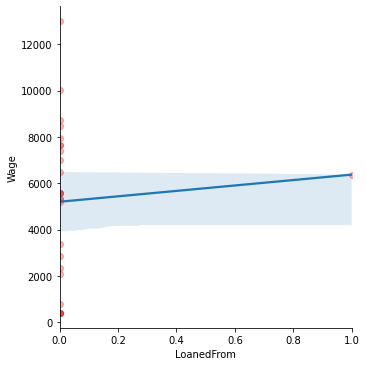

<Figure size 720x360 with 0 Axes>

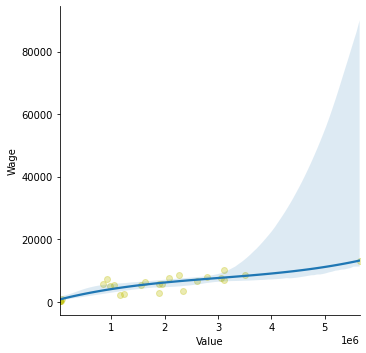

<Figure size 720x360 with 0 Axes>

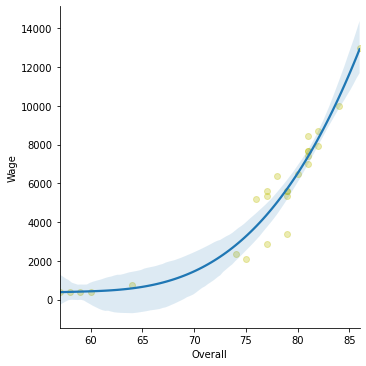

<Figure size 720x360 with 0 Axes>

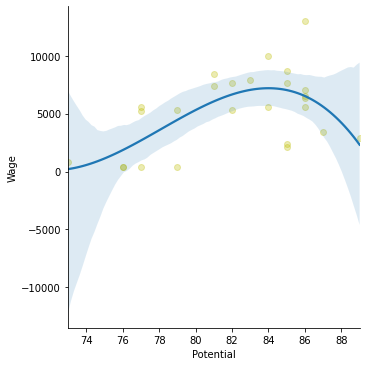

In [15]:
graph(BorussiaDortmund)

# 상상상위 팀

# 6. Middlesbrough

In [16]:
Middlesbrough = pd.read_pickle('./FifaClub/Middlesbrough.pkl')
check(Middlesbrough)

Middlesbrough의 인원:  20
             Wage
count    20.00000
mean   3048.50000
std    2188.14816
min     390.00000
25%    1072.50000
50%    3120.00000
75%    4680.00000
max    7540.00000
         Overall
count  20.000000
mean   67.600000
std     5.557356
min    56.000000
25%    64.750000
50%    70.000000
75%    72.000000
max    74.000000
       Potential
count  20.000000
mean   73.200000
std     4.443801
min    64.000000
25%    71.000000
50%    72.500000
75%    76.000000
max    82.000000
               Value
count      20.000000
mean   242970.000000
std    229174.124446
min      3900.000000
25%     83687.500000
50%    188500.000000
75%    312000.000000
max    845000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
359,7540,200765,M. Bešić,25,Bosnia Herzegovina,74,79,Middlesbrough,845000.0,1893,Right,2.0,3.0,3.0,3,Normal,1,LCM,37.0,NaN,1,"Jun 30, 2019",177.5,80,66,66,66,67,68,68,68,67,70,70,70,68,72,72,72,68,71,75,75,75,71,71,76,76,76,71,45.0,55.0,67.0,76.0,41.0,71.0,52.0,55.0,69.0,77.0,61.0,65.0,73.0,72.0,73.0,59.0,81.0,69.0,74.0,51.0,83.0,68.0,59.0,68.0,48.0,76.0,73.0,76.0,79.0,14.0,7.0,13.0,7.0,12.0,0.0,13.647093,3.0,Medfielder,89.281101,3048.5,80.227329,3120.0,80.459087,390.0,59.687076,58
686,5330,194334,Daniel Ayala,27,Spain,74,76,Middlesbrough,715000.0,1696,Right,1.0,3.0,2.0,6,Normal,1,RCB,4.0,"Jan 24, 2014",0,2020,187.5,84,59,59,59,59,60,60,60,59,61,61,61,61,63,63,63,61,66,70,70,70,66,68,74,74,74,68,33.0,43.0,79.0,58.0,29.0,66.0,41.0,32.0,60.0,67.0,67.0,66.0,62.0,70.0,54.0,47.0,73.0,74.0,78.0,32.0,80.0,72.0,49.0,60.0,37.0,65.0,74.0,72.0,67.0,15.0,8.0,15.0,6.0,10.0,1417000.0,13.480039,3.0,Defender,85.812941,3048.5,80.227329,3120.0,80.459087,390.0,59.687076,58
449,6630,220862,J. Hugill,26,England,72,75,Middlesbrough,507000.0,1772,Right,1.0,2.0,3.0,1,Normal,1,ST,11.0,NaN,1,"Jun 30, 2019",180.0,85,72,72,72,67,69,69,69,67,65,65,65,66,58,58,58,66,56,52,52,52,56,54,55,55,55,54,53.0,72.0,80.0,63.0,61.0,67.0,55.0,35.0,25.0,67.0,69.0,77.0,61.0,66.0,62.0,73.0,86.0,84.0,85.0,58.0,92.0,28.0,67.0,57.0,62.0,62.0,38.0,32.0,34.0,15.0,7.0,14.0,13.0,14.0,0.0,13.136268,2.0,Foward,87.995109,3048.5,80.227329,3120.0,80.459087,390.0,59.687076,58
710,5200,186385,A. Clayton,29,England,73,73,Middlesbrough,403000.0,1915,Right,1.0,3.0,3.0,4,Normal,1,CDM,8.0,"Aug 13, 2014",0,2021,172.5,75,64,64,64,68,67,67,67,68,69,69,69,69,72,72,72,69,73,74,74,74,73,72,70,70,70,72,69.0,59.0,45.0,75.0,40.0,67.0,67.0,66.0,73.0,70.0,67.0,67.0,66.0,71.0,69.0,68.0,61.0,76.0,65.0,66.0,80.0,74.0,55.0,66.0,66.0,75.0,70.0,73.0,69.0,14.0,9.0,10.0,12.0,10.0,767000.0,12.906694,3.0,Defender,85.566062,3048.5,80.227329,3120.0,80.459087,390.0,59.687076,58
1001,4030,169697,D. Randolph,31,Republic of Ireland,73,73,Middlesbrough,312000.0,1172,Right,1.0,3.0,1.0,6,Stocky,1,GK,23.0,"Jul 22, 2017",0,2021,185.0,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,14.0,16.0,33.0,16.0,14.0,15.0,14.0,34.0,33.0,41.0,44.0,50.0,73.0,43.0,36.0,61.0,34.0,57.0,14.0,29.0,18.0,11.0,35.0,30.0,36.0,15.0,14.0,14.0,75.0,66.0,66.0,71.0,75.0,598000.0,12.650762,3.0,GoalKeeper,83.017698,3048.5,80.227329,3120.0,80.459087,390.0,59.687076,58
803,4680,187942,R. Gestede,29,Benin,71,71,Middlesbrough,312000.0,1698,Right,1.0,3.0,3.0,6,Normal,0,ST,39.0,"Jan 4, 2017",0,2020,190.0,86,71,71,71,63,66,66,66,63,62,62,62,61,59,59,59,61,50,52,52,52,50,49,54,54,54,49,39.0,69.0,83.0,59.0,66.0,65.0,50.0,60.0,50.0,70.0,52.0,66.0,56.0,62.0,52.0,72.0,82.0,65.0,90.0,68.0,73.0,36.0,71.0,42.0,65.0,56.0,25.0,39.0,23.0,6.0,13.0,14.0,8.0,7.0,585000.0,12.650762,3.0,Foward,84.512670,3048.5,80.227329,3120.0,80.459087,390.0,59.687076,58
1544,2860,213697,P. McNair,23,Northern Ireland,70,78,Middlesbrough,299000.0,1803,Right,1.0,3.0,3.0,6,Lean,1,CDM,17.0,"Jun 26, 2018",0,2022,180.0,72,65,65,65,63,65,65,65,63,65,65,65,63,67,67,67,63,67,71,71,71,67,68,74,74,74,68,43.0,53.0,72.0,69.0,45.0,66.0,49.0,36.0,66.0,66.0,63.0,64.0,58.0,69.0,63.0,66.

<Figure size 720x360 with 0 Axes>

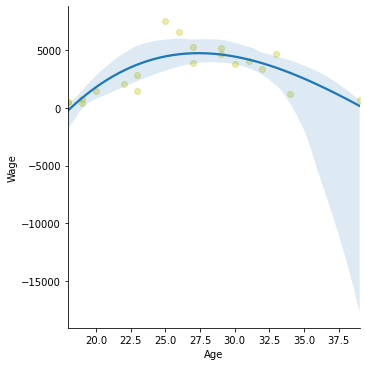

<Figure size 720x360 with 0 Axes>

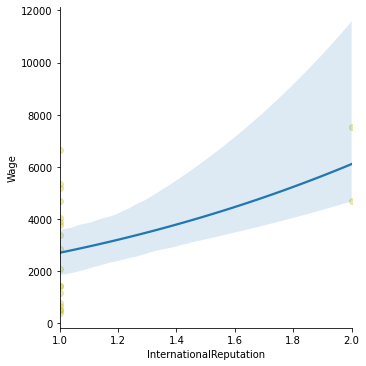

<Figure size 720x360 with 0 Axes>

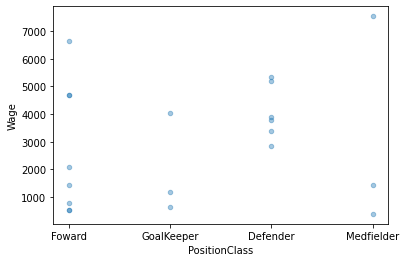

<Figure size 1440x1440 with 0 Axes>

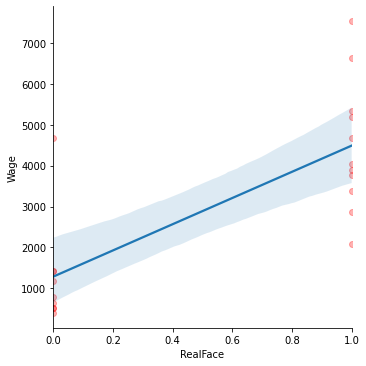

<Figure size 1440x1440 with 0 Axes>

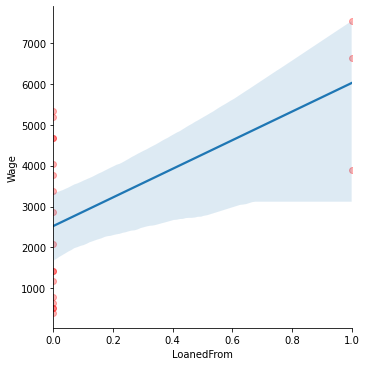

<Figure size 720x360 with 0 Axes>

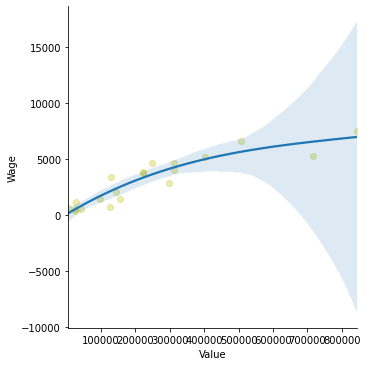

<Figure size 720x360 with 0 Axes>

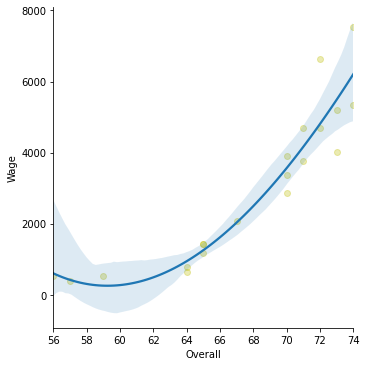

<Figure size 720x360 with 0 Axes>

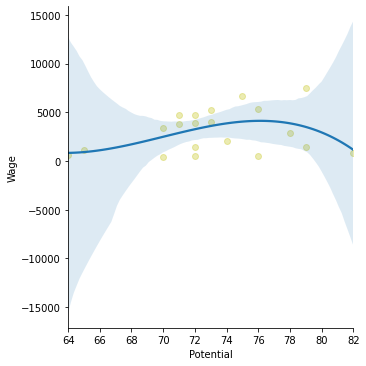

In [17]:
graph(Middlesbrough)

# 상상위 팀

# 7. Udinese

In [18]:
Udinese = pd.read_pickle('./FifaClub/Udinese.pkl')
check(Udinese)

Udinese의 인원:  27
              Wage
count    27.000000
mean   2007.777778
std    1050.158718
min     520.000000
25%    1040.000000
50%    2210.000000
75%    2860.000000
max    3770.000000
         Overall
count  27.000000
mean   71.592593
std     3.992871
min    65.000000
25%    68.000000
50%    73.000000
75%    75.000000
max    77.000000
       Potential
count  27.000000
mean   78.518519
std     3.955234
min    70.000000
25%    76.000000
50%    77.000000
75%    81.500000
max    87.000000
              Value
count  2.700000e+01
mean   6.330278e+05
std    4.874486e+05
min    1.202500e+05
25%    1.820000e+05
50%    5.070000e+05
75%    1.007500e+06
max    1.625000e+06


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
1427,3120,236791,A. Barák,23,Czech Republic,77,84,Udinese,1625000.0,1965,Left,1.0,3.0,4.0,2,Lean,0,CM,72.0,"Jul 1, 2017",0,2022,187.5,86,74,74,74,76,76,76,76,76,77,77,77,76,78,78,78,76,69,69,69,69,69,67,63,63,63,67,72.0,68.0,60.0,80.0,64.0,78.0,62.0,66.0,78.0,80.0,66.0,68.0,63.0,72.0,63.0,81.0,58.0,77.0,78.0,78.0,58.0,64.0,74.0,76.0,66.0,76.0,25.0,66.0,62.0,14.0,15.0,10.0,12.0,11.0,3250000.0,14.301019,4.5,Medfielder,80.459087,2007.777778,76.052817,2210.0,77.012002,520.0,62.5575,29
1633,2730,233299,Felipe Vizeu,21,Brazil,75,87,Udinese,1560000.0,1746,Left,1.0,3.0,3.0,2,Normal,0,ST,9.0,"Jul 17, 2018",0,2023,180.0,82,75,75,75,69,72,72,72,69,69,69,69,68,62,62,62,68,52,50,50,50,52,51,48,48,48,51,45.0,74.0,78.0,60.0,75.0,67.0,57.0,45.0,52.0,73.0,70.0,79.0,67.0,72.0,65.0,78.0,66.0,66.0,79.0,63.0,55.0,25.0,77.0,60.0,68.0,73.0,20.0,24.0,38.0,6.0,10.0,9.0,12.0,11.0,3120000.0,14.260197,4.5,Foward,79.124231,2007.777778,76.052817,2210.0,77.012002,520.0,62.5575,29
1087,3770,224933,K. Lasagna,25,Italy,77,80,Udinese,1495000.0,1824,Left,2.0,3.0,3.0,2,Lean,0,ST,9.0,"Jan 14, 2017",0,2020,182.5,80,78,78,78,76,77,77,77,76,74,74,74,74,65,65,65,74,55,50,50,50,55,53,45,45,45,53,60.0,78.0,72.0,66.0,74.0,76.0,66.0,42.0,50.0,79.0,89.0,88.0,81.0,76.0,72.0,72.0,76.0,69.0,69.0,66.0,40.0,30.0,80.0,58.0,66.0,74.0,26.0,20.0,18.0,8.0,14.0,13.0,15.0,15.0,2808000.0,14.217637,4.5,Foward,82.350955,2007.777778,76.052817,2210.0,77.012002,520.0,62.5575,29
1949,2340,225439,R. Mandragora,21,Italy,75,85,Udinese,1365000.0,1980,Left,1.0,3.0,3.0,3,Lean,0,LCM,38.0,"Jul 26, 2018",0,2023,180.0,76,68,68,68,71,71,71,71,71,73,73,73,72,75,75,75,72,74,76,76,76,74,73,74,74,74,73,65.0,59.0,65.0,77.0,55.0,76.0,66.0,57.0,74.0,75.0,54.0,67.0,73.0,74.0,74.0,66.0,68.0,76.0,77.0,65.0,67.0,74.0,62.0,75.0,52.0,69.0,77.0,75.0,69.0,13.0,14.0,9.0,14.0,16.0,2730000.0,14.126666,4.5,Medfielder,77.583335,2007.777778,76.052817,2210.0,77.012002,520.0,62.5575,29
1121,3640,201013,L. Teodorczyk,27,Poland,76,77,Udinese,1170000.0,1791,Right,2.0,2.0,3.0,2,Normal,0,ST,91.0,"Aug 17, 2018",0,2022,185.0,86,76,76,76,70,73,73,73,70,70,70,70,70,64,64,64,70,54,53,53,53,54,52,51,51,51,52,57.0,77.0,82.0,69.0,75.0,65.0,50.0,49.0,45.0,70.0,66.0,74.0,61.0,72.0,58.0,77.0,69.0,82.0,81.0,68.0,77.0,24.0,80.0,65.0,65.0,74.0,37.0,22.0,20.0,15.0,11.0,7.0,7.0,14.0,2197000.0,13.972515,2.0,Foward,82.000136,2007.777778,76.052817,2210.0,77.012002,520.0,62.5575,29
1245,3380,210463,D. Machís,25,Venezuela,75,78,Udinese,1105000.0,1901,Right,1.0,4.0,4.0,2,Stocky,0,LM,7.0,"Jul 18, 2018",0,2022,167.5,74,73,73,73,77,76,76,76,77,75,75,75,76,68,68,68,76,60,57,57,57,60,56,50,50,50,56,70.0,73.0,51.0,72.0,57.0,82.0,65.0,56.0,66.0,74.0,91.0,88.0,88.0,66.0,91.0,81.0,81.0,68.0,58.0,69.0,72.0,38.0,70.0,64.0,62.0,72.0,40.0,35.0,24.0,8.0,8.0,10.0,13.0,10.0,2067000.0,13.915357,4.0,Medfielder,81.259268,2007.777778,76.052817,2210.0,77.012002,520.0,62.5575,29
1592,2860,219536,I. Pussetto,22,Argentina,74,82,Udinese,1105000.0,1751,Right,1.0,4.0,3.0,2,Lean,0,RW,23.0,"Jul 23, 2018",0,2023,177.5,74,76,76,76,75,75,75,75,75,73,73,73,75,66,66,66,75,54,49,49,49,54,50,42,42,42,50,65.0,78.0,67.0,68.0,64.0,80.0,43.0,42.0,67.0,77.0,79.0,78.0,77.0,68.0,66.0,7

<Figure size 720x360 with 0 Axes>

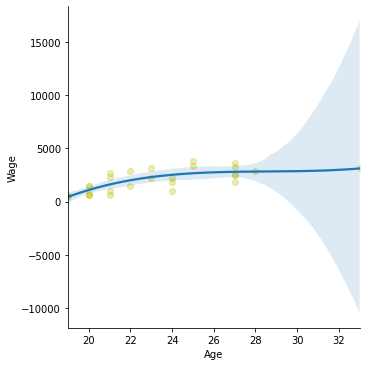

<Figure size 720x360 with 0 Axes>

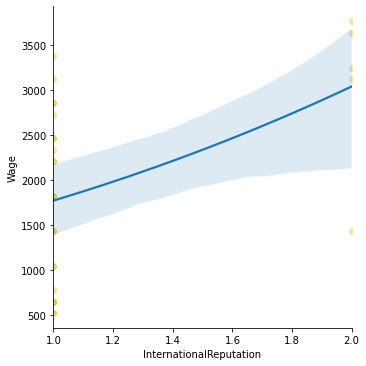

<Figure size 720x360 with 0 Axes>

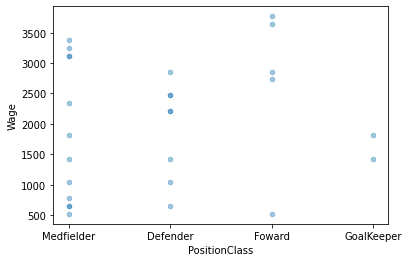

<Figure size 1440x1440 with 0 Axes>

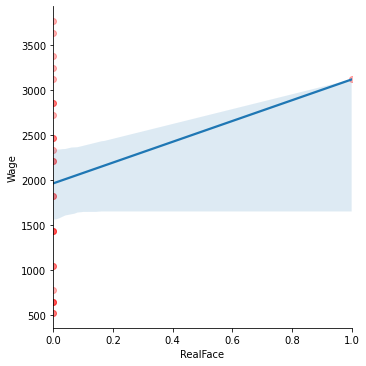

<Figure size 1440x1440 with 0 Axes>

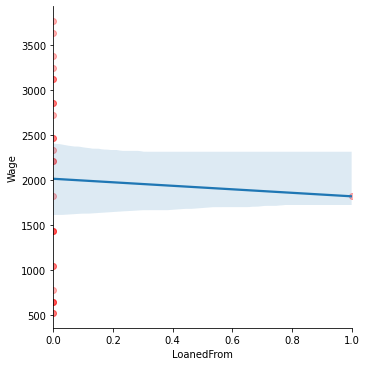

<Figure size 720x360 with 0 Axes>

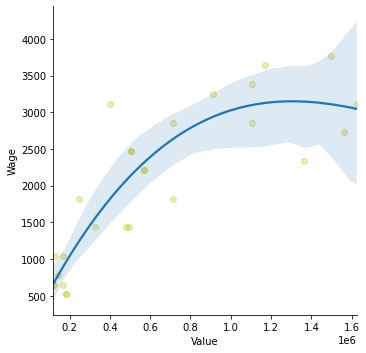

<Figure size 720x360 with 0 Axes>

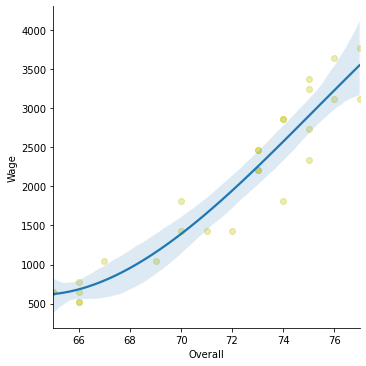

<Figure size 720x360 with 0 Axes>

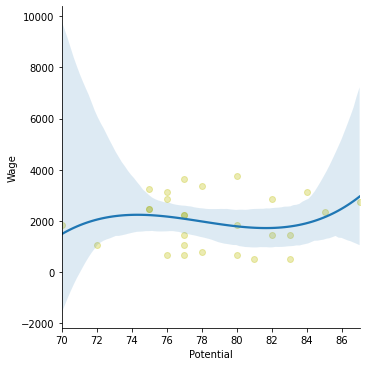

In [19]:
graph(Udinese)

# 상위 팀

# 8. Rayo Vallecano

In [20]:
RayoVallecano = pd.read_pickle('./FifaClub/Rayo Vallecano.pkl')
check(RayoVallecano)

Rayo Vallecano의 인원:  23
              Wage
count    23.000000
mean   1503.478261
std     903.923814
min     130.000000
25%     780.000000
50%    1820.000000
75%    2275.000000
max    2730.000000
         Overall
count  23.000000
mean   69.956522
std     6.532981
min    57.000000
25%    67.500000
50%    72.000000
75%    74.000000
max    77.000000
       Potential
count  23.000000
mean   74.521739
std     3.355722
min    69.000000
25%    72.000000
50%    74.000000
75%    76.500000
max    81.000000
              Value
count  2.300000e+01
mean   4.962891e+05
std    4.302140e+05
min    2.210000e+04
25%    7.637500e+04
50%    3.640000e+05
75%    8.450000e+05
max    1.170000e+06


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
1710,2600,219953,Embarba,26,Spain,76,77,Rayo Vallecano,1170000.0,1907,Right,1.0,3.0,3.0,6,Normal,0,RM,11.0,"Jul 1, 2013",0,2021,170.0,66,71,71,71,76,76,76,76,76,77,77,77,77,75,75,75,77,66,65,65,65,66,64,56,56,56,64,71.0,72.0,45.0,78.0,53.0,76.0,62.0,65.0,76.0,72.0,76.0,79.0,79.0,76.0,78.0,69.0,61.0,77.0,61.0,68.0,56.0,49.0,75.0,79.0,62.0,61.0,41.0,52.0,49.0,13.0,6.0,6.0,14.0,11.0,2665000.0,13.972515,3.0,Medfielder,78.636513,1503.478261,73.162014,1820.0,75.071411,130.0,48.751973,21
1643,2730,173030,O. Trejo,30,Argentina,77,77,Rayo Vallecano,1105000.0,2073,Right,1.0,4.0,4.0,6,Normal,0,RCM,8.0,"Jul 1, 2017",0,2020,177.5,79,75,75,75,77,77,77,77,77,78,78,78,77,76,76,76,77,72,72,72,72,72,70,68,68,68,70,73.0,73.0,64.0,75.0,72.0,80.0,74.0,69.0,70.0,79.0,67.0,73.0,85.0,76.0,76.0,73.0,63.0,86.0,71.0,68.0,70.0,62.0,74.0,79.0,73.0,74.0,66.0,65.0,55.0,14.0,14.0,7.0,16.0,11.0,2431000.0,13.915357,4.0,Medfielder,79.124231,1503.478261,73.162014,1820.0,75.071411,130.0,48.751973,21
2030,2340,198198,Jordi Amat,26,Spain,76,80,Rayo Vallecano,1105000.0,1704,Right,2.0,3.0,2.0,4,Normal,1,LCB,16.0,"Aug 10, 2018",0,2022,182.5,83,58,58,58,55,57,57,57,55,58,58,58,56,62,62,62,56,67,71,71,71,67,69,76,76,76,69,31.0,34.0,74.0,68.0,28.0,50.0,40.0,36.0,52.0,65.0,61.0,69.0,59.0,70.0,57.0,75.0,78.0,66.0,79.0,65.0,82.0,71.0,30.0,59.0,28.0,69.0,76.0,76.0,79.0,9.0,6.0,7.0,16.0,8.0,2509000.0,13.915357,3.0,Defender,77.583335,1503.478261,73.162014,1820.0,75.071411,130.0,48.751973,21
2395,1950,218746,Pozo,22,Spain,74,81,Rayo Vallecano,1040000.0,1858,Right,1.0,4.0,3.0,2,Lean,1,CAM,22.0,"Jul 27, 2018",0,2023,167.5,65,71,71,71,74,73,73,73,74,74,74,74,73,71,71,71,73,64,63,63,63,64,62,57,57,57,62,65.0,70.0,57.0,77.0,69.0,77.0,65.0,64.0,75.0,78.0,74.0,72.0,76.0,66.0,80.0,64.0,55.0,57.0,57.0,74.0,39.0,46.0,69.0,65.0,66.0,62.0,61.0,52.0,50.0,8.0,7.0,8.0,8.0,7.0,2496000.0,13.854732,4.0,Medfielder,75.760973,1503.478261,73.162014,1820.0,75.071411,130.0,48.751973,21
1720,2600,186197,G. Kakuta,27,DR Congo,76,76,Rayo Vallecano,1040000.0,1922,Left,2.0,3.0,4.0,6,Lean,1,LM,10.0,"Jul 13, 2018",0,2022,170.0,64,74,74,74,78,76,76,76,78,77,77,77,77,72,72,72,77,62,59,59,59,62,59,52,52,52,59,79.0,71.0,67.0,74.0,62.0,79.0,77.0,78.0,66.0,80.0,83.0,75.0,86.0,73.0,85.0,77.0,81.0,66.0,65.0,65.0,42.0,46.0,70.0,75.0,51.0,74.0,30.0,41.0,25.0,7.0,12.0,7.0,14.0,13.0,2288000.0,13.854732,4.5,Medfielder,78.636513,1503.478261,73.162014,1820.0,75.071411,130.0,48.751973,21
2583,1820,225299,E. Velázquez,24,Uruguay,74,80,Rayo Vallecano,845000.0,1595,Right,1.0,3.0,2.0,2,Lean,0,CB,19.0,"Jul 23, 2018",0,2021,182.5,79,57,57,57,52,55,55,55,52,55,55,55,55,62,62,62,55,65,72,72,72,65,67,75,75,75,67,24.0,51.0,65.0,67.0,28.0,53.0,25.0,26.0,71.0,71.0,63.0,46.0,33.0,68.0,50.0,57.0,81.0,69.0,77.0,41.0,69.0,75.0,29.0,35.0,37.0,65.0,76.0,78.0,75.0,7.0,14.0,10.0,11.0,13.0,2028000.0,13.647093,3.0,Defender,75.071411,1503.478261,73.162014,1820.0,75.071411,130.0,48.751973,21
2073,2210,216447,Álvaro García,25,Spain,74,75,Rayo Vallecano,845000.0,1776,Left,1.0,3.0,3.0,6,Lean,0,LM,18.0,"Aug 23, 2018",0,2023,165.0,59,70,70,70,75,74,74,74,75,73,73,73,75,65,65,65,75,58,50,50,50,58,55,42,42,42,55,71.0,68.0,57.0,68.0,49.0,71.0,61.0

<Figure size 720x360 with 0 Axes>

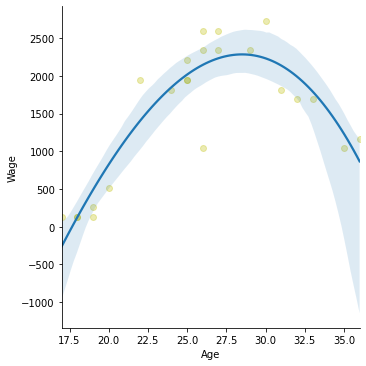

<Figure size 720x360 with 0 Axes>

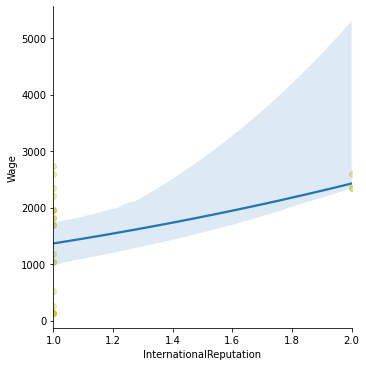

<Figure size 720x360 with 0 Axes>

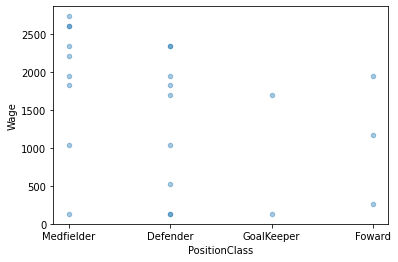

<Figure size 1440x1440 with 0 Axes>

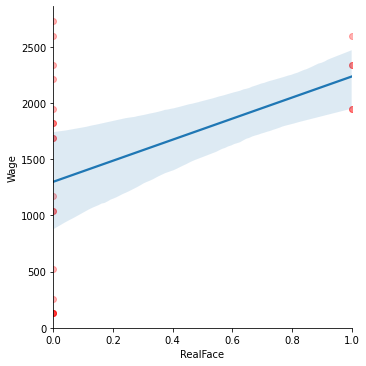

<Figure size 1440x1440 with 0 Axes>

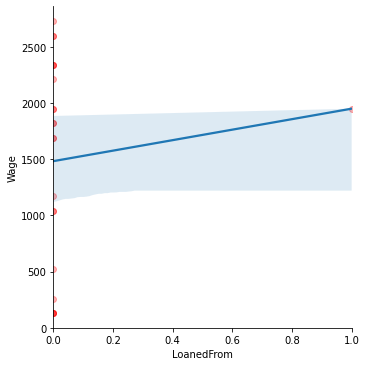

<Figure size 720x360 with 0 Axes>

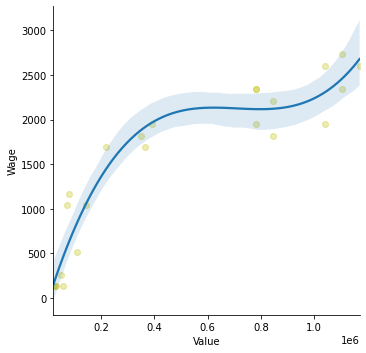

<Figure size 720x360 with 0 Axes>

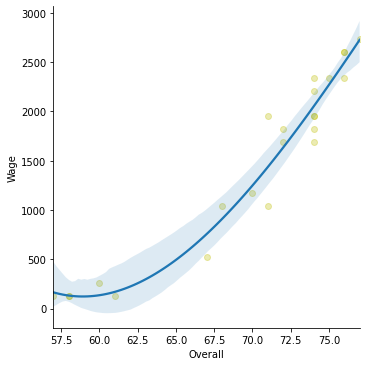

<Figure size 720x360 with 0 Axes>

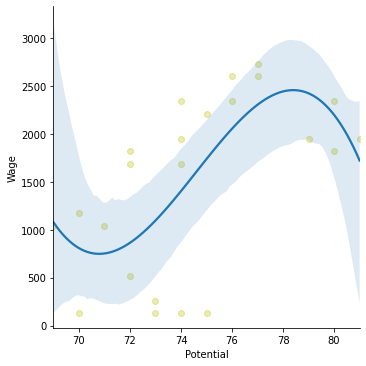

In [21]:
graph(RayoVallecano)

# 중상위 팀

# 9. Bahia
- 나이가 음의 상관이다.

In [22]:
Bahia = pd.read_pickle('./FifaClub/Bahia.pkl')
check(Bahia)

Bahia의 인원:  15
              Wage
count    15.000000
mean   1057.333333
std     493.478421
min     390.000000
25%     585.000000
50%    1170.000000
75%    1495.000000
max    1690.000000
         Overall
count  15.000000
mean   70.533333
std     4.085981
min    64.000000
25%    67.500000
50%    71.000000
75%    73.500000
max    76.000000
       Potential
count  15.000000
mean   70.533333
std     4.085981
min    64.000000
25%    67.500000
50%    71.000000
75%    73.500000
max    76.000000
               Value
count      15.000000
mean   295880.000000
std    269933.324969
min     18200.000000
25%     68250.000000
50%    260000.000000
75%    429000.000000
max    845000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
2635,1690,230250,Emilio Piodão,26,Brazil,76,76,Bahia,845000.0,2048,Right,1.0,2.0,2.0,6,Normal,0,RDM,6.0,"Jan 1, 2018",0,2021,175.0,78,69,69,69,69,70,70,70,69,71,71,71,71,73,73,73,71,74,76,76,76,74,74,76,76,76,74,59.0,58.0,68.0,74.0,60.0,67.0,82.0,49.0,77.0,73.0,77.0,72.0,74.0,71.0,73.0,73.0,91.0,81.0,73.0,71.0,81.0,76.0,62.0,64.0,61.0,66.0,74.0,76.0,68.0,13.0,12.0,15.0,8.0,15.0,1612000.0,13.647093,2.0,Defender,74.330753,1057.333333,69.644506,1170.0,70.656134,390.0,59.687076,13
2753,1690,230224,Juli Freitinho,30,Brazil,76,76,Bahia,715000.0,1682,Right,1.0,3.0,2.0,3,Normal,0,RCB,3.0,"Jan 1, 2018",0,2021,190.0,91,60,60,60,56,58,58,58,56,57,57,57,57,60,60,60,57,66,69,69,69,66,67,76,76,76,67,54.0,44.0,77.0,73.0,35.0,51.0,52.0,50.0,43.0,63.0,41.0,51.0,32.0,65.0,38.0,46.0,58.0,57.0,91.0,45.0,82.0,66.0,67.0,42.0,63.0,71.0,82.0,74.0,75.0,11.0,15.0,14.0,13.0,12.0,1365000.0,13.480039,3.0,Defender,74.330753,1057.333333,69.644506,1170.0,70.656134,390.0,59.687076,13
2896,1560,230339,Padilhisco,26,Brazil,74,74,Bahia,624000.0,1886,Left,1.0,3.0,4.0,6,Normal,0,LB,5.0,"Jan 1, 2018",0,2021,180.0,82,66,66,66,70,67,67,67,70,67,67,67,71,68,68,68,71,75,70,70,70,75,74,69,69,69,74,74.0,56.0,62.0,67.0,45.0,77.0,66.0,56.0,67.0,76.0,82.0,83.0,71.0,65.0,67.0,62.0,60.0,81.0,72.0,61.0,45.0,66.0,51.0,51.0,55.0,76.0,67.0,75.0,74.0,13.0,8.0,9.0,10.0,12.0,1183000.0,13.343907,4.5,Defender,73.530819,1057.333333,69.644506,1170.0,70.656134,390.0,59.687076,13
3543,1170,230320,Victorino Magela,30,Brazil,74,74,Bahia,468000.0,1123,Right,1.0,2.0,1.0,6,Normal,0,GK,1.0,"Jan 1, 2018",0,2021,185.0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,9.0,9.0,16.0,9.0,8.0,8.0,19.0,15.0,21.0,41.0,42.0,32.0,68.0,45.0,21.0,61.0,31.0,81.0,8.0,41.0,25.0,21.0,72.0,16.0,62.0,11.0,8.0,9.0,71.0,72.0,73.0,75.0,76.0,897000.0,13.056226,2.0,GoalKeeper,70.656134,1057.333333,69.644506,1170.0,70.656134,390.0,59.687076,13
2988,1430,230446,Marcos Paneira,30,Brazil,73,73,Bahia,390000.0,1815,Right,1.0,3.0,2.0,6,Lean,0,LDM,13.0,"Jan 1, 2018",0,2021,180.0,73,63,63,63,65,64,64,64,65,67,67,67,66,70,70,70,66,71,74,74,74,71,71,74,74,74,71,61.0,59.0,72.0,73.0,41.0,71.0,42.0,43.0,71.0,66.0,59.0,55.0,57.0,73.0,61.0,54.0,71.0,72.0,73.0,64.0,68.0,72.0,41.0,71.0,51.0,66.0,78.0,75.0,74.0,11.0,10.0,9.0,8.0,9.0,728000.0,12.873905,3.0,Defender,72.661288,1057.333333,69.644506,1170.0,70.656134,390.0,59.687076,13
3170,1430,230198,Juli Piresinho,30,Brazil,73,73,Bahia,377000.0,1871,Right,1.0,2.0,3.0,7,Stocky,0,RB,2.0,"Jan 1, 2018",0,2021,177.5,82,59,59,59,60,59,59,59,60,58,58,58,62,61,61,61,62,73,70,70,70,73,73,76,76,76,73,75.0,20.0,71.0,70.0,56.0,65.0,64.0,70.0,46.0,68.0,64.0,75.0,62.0,65.0,61.0,87.0,70.0,68.0,80.0,68.0,84.0,73.0,36.0,42.0,65.0,67.0,74.0,76.0,75.0,10.0,7.0,9.0,7.0,8.0,715000.0,12.840003,2.0,Defender,72.661288,1057.333333,69.644506,1170.0,70.656134,390.0,59.687076,13
3638,1170,230263,Adeilson Gesser,26,Brazil,71,71,Bahia,325000.0,1782,Left,1.0,2.0,3.0,6,Lean,0,RAM,7.0,"Jan 1, 2018",0,2021,172.5,70,66,66,66,73,71,71,71,73,72,72,72,72,67,67,67,72,62,55,55,55,62,59,48,48,48,59,68.0,62.0,59.0,72.0,76.0,68.0,55.0,73.0,42.0,74.0,73.0,88.0,84.0,76.0,83.0,45.0,72.0,78.0,43.0,50.0,34.0,47.0,70.0,

<Figure size 720x360 with 0 Axes>

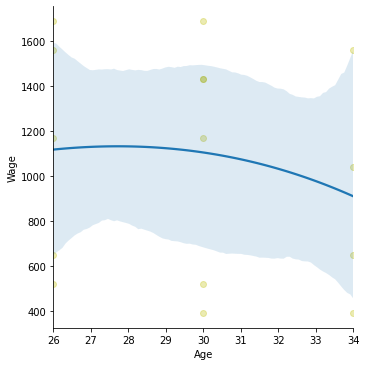

<Figure size 720x360 with 0 Axes>

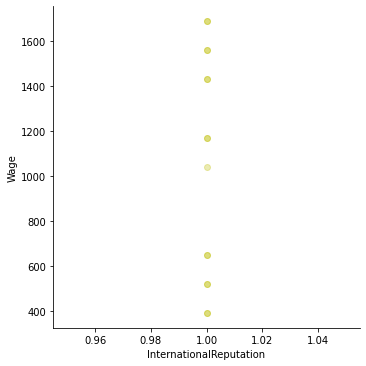

<Figure size 720x360 with 0 Axes>

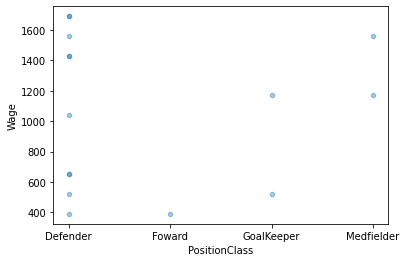

<Figure size 1440x1440 with 0 Axes>

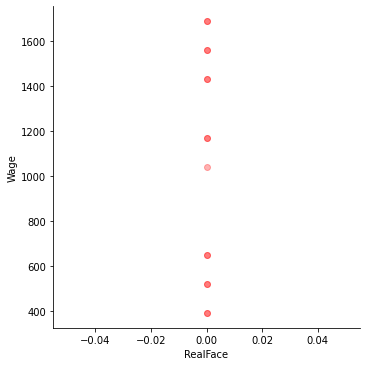

<Figure size 1440x1440 with 0 Axes>

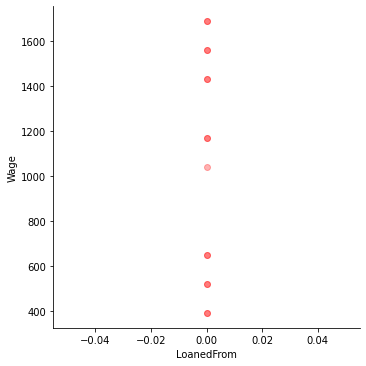

<Figure size 720x360 with 0 Axes>

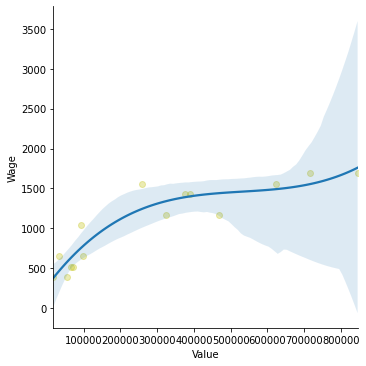

<Figure size 720x360 with 0 Axes>

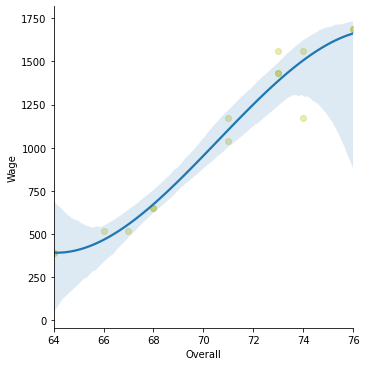

<Figure size 720x360 with 0 Axes>

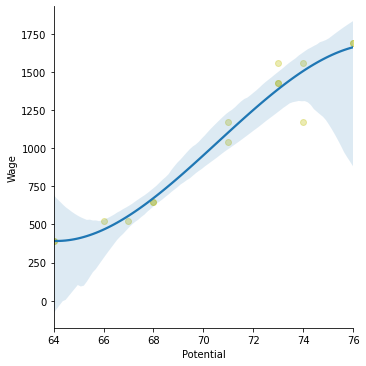

In [23]:
graph(Bahia)

# 중중상위 팀

# 10. Bolton Wanderers
- 나이가 음의 상관이다.

In [24]:
BoltonWanderers = pd.read_pickle('./FifaClub/Bolton Wanderers.pkl')
check(BoltonWanderers)

Bolton Wanderers의 인원:  24
              Wage
count    24.000000
mean    763.750000
std     606.506837
min     130.000000
25%     390.000000
50%     650.000000
75%     942.500000
max    2990.000000
         Overall
count  24.000000
mean   66.625000
std     4.613897
min    54.000000
25%    66.000000
50%    68.000000
75%    69.000000
max    71.000000
       Potential
count  24.000000
mean   68.583333
std     3.740689
min    58.000000
25%    67.000000
50%    68.500000
75%    70.250000
max    79.000000
               Value
count      24.000000
mean   118435.416667
std     87732.514025
min      3900.000000
25%     52000.000000
50%    104000.000000
75%    156000.000000
max    364000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
3807,1040,203537,S. Ameobi,26,England,71,72,Bolton Wanderers,364000.0,1739,Left,1.0,3.0,4.0,6,Lean,1,CAM,10.0,"Jul 14, 2017",0,2020,190.0,78,71,71,71,72,72,72,72,72,71,71,71,71,65,65,65,71,56,54,54,54,56,53,47,47,47,53,64.0,68.0,60.0,64.0,62.0,79.0,60.0,62.0,60.0,73.0,73.0,83.0,76.0,66.0,55.0,70.0,33.0,67.0,75.0,73.0,52.0,42.0,64.0,64.0,68.0,55.0,35.0,26.0,19.0,11.0,8.0,7.0,8.0,12.0,715000.0,12.804912,4.5,Medfielder,69.479371,763.75,66.39549,650.0,64.785096,130.0,48.751973,23
3984,1040,204687,P. Olkowski,28,Poland,71,71,Bolton Wanderers,247000.0,1868,Right,1.0,2.0,3.0,6,Normal,0,RB,16.0,"Jul 10, 2018",0,2020,180.0,76,66,66,66,69,68,68,68,69,68,68,68,70,68,68,68,70,72,70,70,70,72,72,69,69,69,72,68.0,49.0,55.0,70.0,56.0,71.0,53.0,36.0,58.0,70.0,75.0,79.0,73.0,70.0,65.0,67.0,61.0,81.0,72.0,65.0,68.0,67.0,64.0,60.0,47.0,67.0,65.0,72.0,68.0,13.0,15.0,10.0,15.0,10.0,468000.0,12.417148,2.0,Defender,69.479371,763.75,66.39549,650.0,64.785096,130.0,48.751973,23
3745,1040,182209,M. Beevers,28,England,71,71,Bolton Wanderers,247000.0,1527,Left,1.0,2.0,2.0,6,Normal,0,LCB,5.0,"Jul 3, 2016",0,2019,190.0,80,51,51,51,45,47,47,47,45,47,47,47,48,53,53,53,48,61,65,65,65,61,64,71,71,71,64,31.0,36.0,75.0,52.0,38.0,36.0,21.0,57.0,45.0,60.0,50.0,51.0,43.0,62.0,33.0,53.0,70.0,76.0,83.0,27.0,71.0,72.0,26.0,45.0,45.0,61.0,65.0,72.0,70.0,16.0,10.0,13.0,9.0,14.0,468000.0,12.417148,3.5,Defender,69.479371,763.75,66.39549,650.0,64.785096,130.0,48.751973,23
4344,910,170570,S. Ireland,31,Republic of Ireland,70,70,Bolton Wanderers,208000.0,1779,Right,1.0,3.0,3.0,6,Normal,0,CAM,17.0,"Oct 9, 2018",0,2019,170.0,67,64,64,64,68,68,68,68,68,71,71,71,67,68,68,68,67,59,60,60,60,59,56,53,53,53,56,63.0,62.0,42.0,74.0,75.0,67.0,71.0,60.0,64.0,73.0,57.0,51.0,70.0,72.0,78.0,62.0,60.0,45.0,55.0,63.0,60.0,54.0,68.0,75.0,66.0,74.0,39.0,45.0,48.0,16.0,9.0,10.0,11.0,14.0,390000.0,12.245298,3.0,Medfielder,68.145429,763.75,66.39549,650.0,64.785096,130.0,48.751973,23
1479,2990,224265,J. Williams,21,England,69,79,Bolton Wanderers,195000.0,1782,Right,1.0,2.0,3.0,6,Lean,0,RDM,21.0,NaN,1,"Jun 30, 2019",175.0,66,59,59,59,63,62,62,62,63,64,64,64,64,67,67,67,64,68,70,70,70,68,67,67,67,67,67,58.0,53.0,54.0,72.0,62.0,69.0,56.0,52.0,71.0,67.0,65.0,54.0,59.0,63.0,69.0,63.0,48.0,70.0,49.0,58.0,78.0,66.0,44.0,60.0,59.0,63.0,68.0,73.0,70.0,14.0,9.0,10.0,10.0,9.0,0.0,12.180760,2.0,Defender,80.033631,763.75,66.39549,650.0,64.785096,130.0,48.751973,23
4578,780,165736,D. Wheater,31,England,70,70,Bolton Wanderers,156000.0,1509,Right,1.0,3.0,2.0,6,Normal,0,CB,31.0,"Aug 11, 2016",0,2019,192.5,87,55,55,55,47,51,51,51,47,50,50,50,49,56,56,56,49,57,66,66,66,57,60,70,70,70,60,29.0,42.0,68.0,57.0,55.0,44.0,39.0,26.0,63.0,50.0,42.0,44.0,42.0,63.0,30.0,64.0,33.0,53.0,91.0,27.0,78.0,66.0,48.0,48.0,38.0,56.0,72.0,72.0,67.0,13.0,15.0,7.0,12.0,11.0,299000.0,11.957618,3.0,Defender,66.605751,763.75,66.39549,650.0,64.785096,130.0,48.751973,23
5966,520,203060,J. Vela,24,England,68,73,Bolton Wanderers,156000.0,1871,Right,1.0,3.0,3.0,6,Lean,0,CAM,6.0,"Jun 1, 2011",0,2019,182.5,70,64,64,64,69,67,67,67,69,69,69,69,70,69,69,69,70,69,68,68,68,69,67,65,65,65,67,70.0,60.0,48.0,70.0,56.0,66.0,58.0,61.0,66.0,70.0,68.0,7

<Figure size 720x360 with 0 Axes>

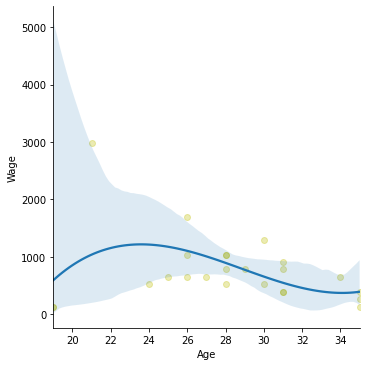

<Figure size 720x360 with 0 Axes>

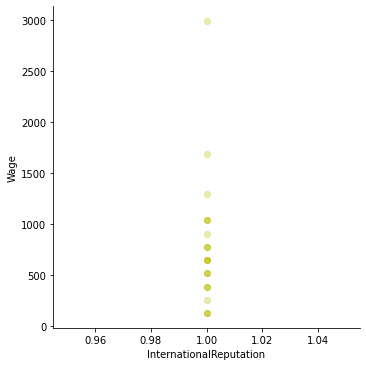

<Figure size 720x360 with 0 Axes>

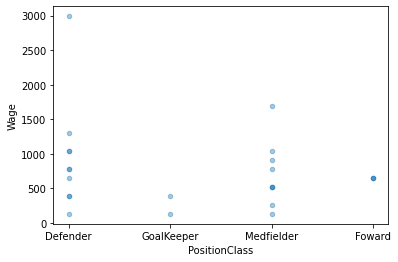

<Figure size 1440x1440 with 0 Axes>

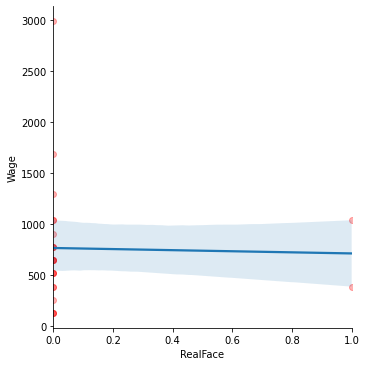

<Figure size 1440x1440 with 0 Axes>

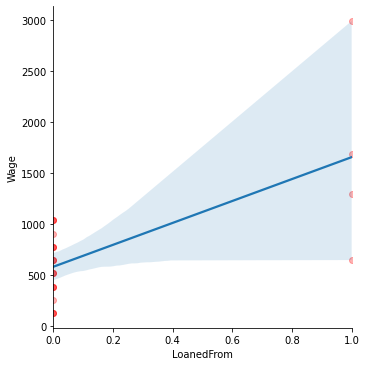

<Figure size 720x360 with 0 Axes>

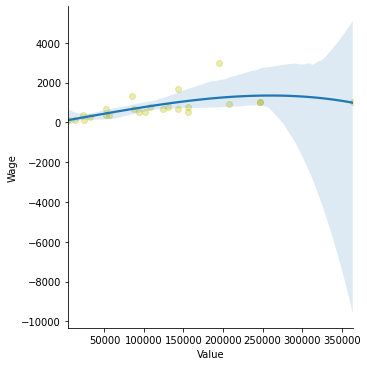

<Figure size 720x360 with 0 Axes>

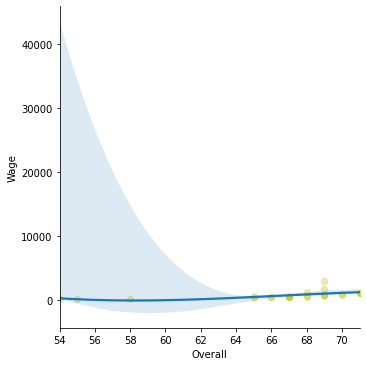

<Figure size 720x360 with 0 Axes>

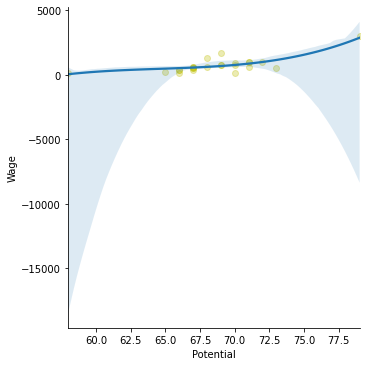

In [25]:
graph(BoltonWanderers)

# 중위 팀

# 11. Toronto FC

In [26]:
TorontoFC = pd.read_pickle('./FifaClub/Toronto FC.pkl')
check(TorontoFC)

Toronto FC의 인원:  25
              Wage
count    25.000000
mean    566.800000
std     499.105199
min     130.000000
25%     260.000000
50%     390.000000
75%     780.000000
max    1950.000000
         Overall
count  25.000000
mean   67.320000
std     7.192125
min    51.000000
25%    64.000000
50%    67.000000
75%    72.000000
max    82.000000
       Potential
count  25.000000
mean   71.120000
std     5.418487
min    63.000000
25%    65.000000
50%    72.000000
75%    74.000000
max    82.000000
              Value
count  2.500000e+01
mean   3.327480e+05
std    5.545374e+05
min    7.800000e+03
25%    4.875000e+04
50%    1.007500e+05
75%    3.770000e+05
max    2.600000e+06


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
2354,1950,184431,S. Giovinco,31,Italy,82,82,Toronto FC,2600000.0,1957,Right,2.0,4.0,4.0,2,Normal,1,CF,21.0,"Feb 3, 2015",0,2019,160.0,61,77,77,77,84,83,83,83,84,84,84,84,83,77,77,77,83,61,58,58,58,61,56,43,43,43,56,72.0,80.0,34.0,80.0,75.0,86.0,90.0,93.0,76.0,86.0,88.0,80.0,94.0,80.0,91.0,80.0,34.0,77.0,42.0,81.0,75.0,26.0,82.0,81.0,73.0,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,3900000.0,14.771022,4.0,Foward,75.760973,566.8,63.417692,390.0,59.687076,130.0,48.751973,15
3461,1300,176237,J. Altidore,28,United States,76,76,Toronto FC,1040000.0,1850,Right,3.0,4.0,3.0,8,Normal,1,ST,17.0,"Jan 16, 2015",0,2020,180.0,79,77,77,77,71,74,74,74,71,72,72,72,70,66,66,66,70,54,55,55,55,54,52,53,53,53,52,49.0,76.0,77.0,67.0,70.0,70.0,66.0,72.0,52.0,70.0,68.0,73.0,63.0,70.0,51.0,81.0,75.0,69.0,91.0,66.0,80.0,32.0,77.0,71.0,75.0,70.0,15.0,34.0,27.0,16.0,9.0,14.0,12.0,12.0,1560000.0,13.854732,4.0,Foward,71.708885,566.8,63.417692,390.0,59.687076,130.0,48.751973,15
3504,1170,189508,Víctor Vázquez,31,Spain,76,76,Toronto FC,845000.0,1866,Right,1.0,2.0,3.0,8,Normal,0,CAM,7.0,"Feb 20, 2017",0,2018,172.5,76,70,70,70,74,75,75,75,74,77,77,77,75,77,77,77,75,63,66,66,66,63,59,54,54,54,59,72.0,68.0,49.0,81.0,70.0,77.0,80.0,74.0,78.0,80.0,53.0,50.0,60.0,79.0,74.0,69.0,37.0,69.0,59.0,72.0,55.0,55.0,77.0,79.0,71.0,79.0,45.0,50.0,28.0,8.0,16.0,8.0,15.0,8.0,1274000.0,13.647093,2.0,Medfielder,70.656134,566.8,63.417692,390.0,59.687076,130.0,48.751973,15
3885,1040,155887,M. Bradley,30,United States,76,76,Toronto FC,715000.0,2051,Right,2.0,3.0,2.0,3,Normal,1,CDM,4.0,"Jan 10, 2014",0,2019,185.0,79,70,70,70,72,72,72,72,72,74,74,74,74,77,77,77,74,75,77,77,77,75,74,73,73,73,74,73.0,57.0,63.0,80.0,71.0,73.0,74.0,71.0,79.0,77.0,65.0,64.0,65.0,75.0,72.0,76.0,47.0,89.0,78.0,69.0,80.0,70.0,63.0,73.0,68.0,76.0,69.0,71.0,70.0,7.0,14.0,16.0,16.0,16.0,1079000.0,13.480039,3.0,Defender,69.479371,566.8,63.417692,390.0,59.687076,130.0,48.751973,15
2802,1560,215202,L. Janson,23,Argentina,73,79,Toronto FC,715000.0,1775,Right,1.0,3.0,4.0,5,Normal,0,CF,16.0,NaN,1,"Jun 30, 2019",167.5,67,71,71,71,74,74,74,74,74,74,74,74,73,67,67,67,73,55,52,52,52,55,51,45,45,45,51,55.0,72.0,58.0,69.0,61.0,77.0,52.0,48.0,58.0,76.0,77.0,74.0,85.0,71.0,82.0,65.0,84.0,69.0,44.0,69.0,63.0,27.0,74.0,73.0,54.0,67.0,32.0,24.0,26.0,12.0,12.0,8.0,9.0,15.0,0.0,13.480039,3.0,Foward,73.530819,566.8,63.417692,390.0,59.687076,130.0,48.751973,15
4192,910,183937,G. van der Wiel,30,Netherlands,73,73,Toronto FC,390000.0,1930,Right,2.0,3.0,3.0,7,Lean,1,RCB,9.0,"Feb 1, 2018",0,2021,180.0,78,70,70,70,72,71,71,71,72,72,72,72,73,73,73,73,73,74,74,74,74,74,74,74,74,74,74,70.0,56.0,67.0,75.0,56.0,73.0,55.0,22.0,70.0,73.0,75.0,76.0,72.0,74.0,69.0,74.0,80.0,74.0,74.0,63.0,73.0,69.0,67.0,67.0,43.0,70.0,71.0,73.0,73.0,11.0,15.0,7.0,6.0,7.0,585000.0,12.873905,3.0,Defender,68.145429,566.8,63.417692,390.0,59.687076,130.0,48.751973,15
4491,780,213439,J. Osorio,26,Canada,71,74,Toronto FC,377000.0,1867,Right,1.0,4.0,3.0,2,Normal,1,CM,21.0,"Feb 26, 2013",0,2020,172.5,73,68,68,68,71,71,71,71,71,72,72,72,71,71,71,71,71,66,66,66,66,66,63,60,60,60,63,59.0,67.0,51.0,75.0,55.0,73.0,64.0,65.0,66.0,72.0,67.0,67.0,83.0,69.0,76.0,70.0,54.0,77.0

<Figure size 720x360 with 0 Axes>

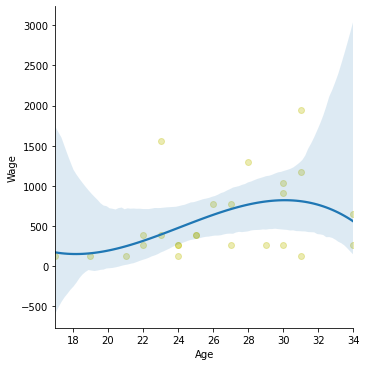

<Figure size 720x360 with 0 Axes>

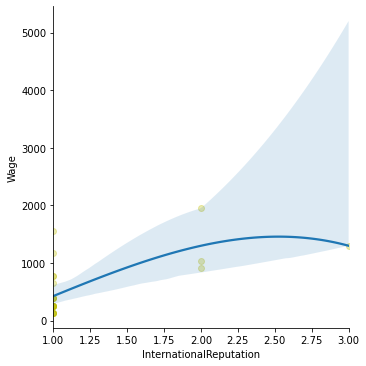

<Figure size 720x360 with 0 Axes>

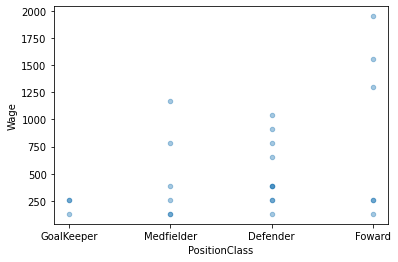

<Figure size 1440x1440 with 0 Axes>

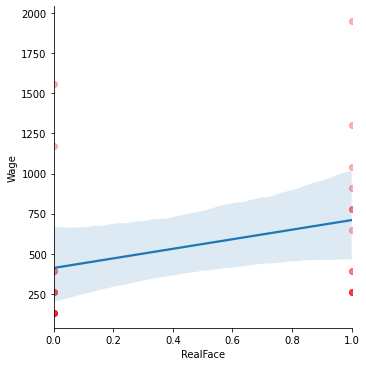

<Figure size 1440x1440 with 0 Axes>

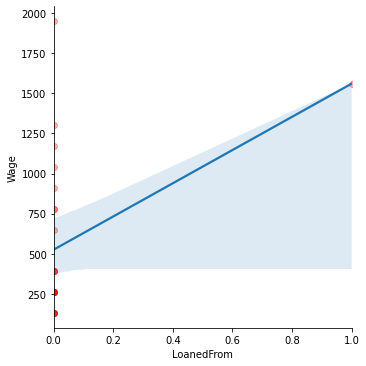

<Figure size 720x360 with 0 Axes>

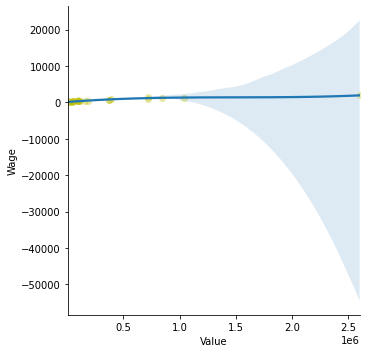

<Figure size 720x360 with 0 Axes>

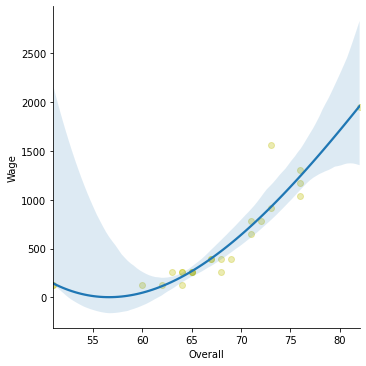

<Figure size 720x360 with 0 Axes>

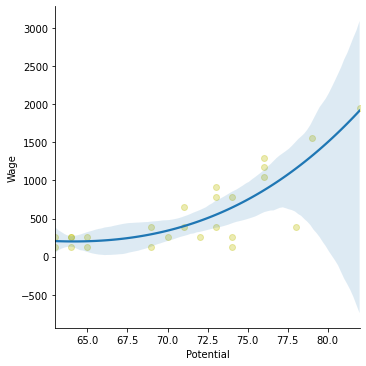

In [27]:
graph(TorontoFC)

# 중위 팀

# 12. Argentinos Juniors

In [28]:
ArgentinosJuniors = pd.read_pickle('./FifaClub/Argentinos Juniors.pkl')
check(ArgentinosJuniors)

Argentinos Juniors의 인원:  22
              Wage
count    22.000000
mean    466.818182
std     375.618682
min     130.000000
25%     260.000000
50%     260.000000
75%     520.000000
max    1430.000000
         Overall
count  22.000000
mean   64.409091
std     4.584229
min    58.000000
25%    61.000000
50%    63.500000
75%    69.000000
max    72.000000
       Potential
count  22.000000
mean   72.772727
std     5.903444
min    61.000000
25%    68.250000
50%    72.500000
75%    76.000000
max    84.000000
               Value
count      22.000000
mean   129881.818182
std    134370.616248
min     27300.000000
25%     45500.000000
50%     61750.000000
75%    180375.000000
max    429000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
3531,1170,244206,N. Pérez,18,Argentina,70,84,Argentinos Juniors,429000.0,1394,Right,1.0,3.0,2.0,6,Lean,0,CB,6.0,NaN,1,"Jun 30, 2019",182.5,76,44,44,44,41,42,42,42,41,43,43,43,44,49,49,49,44,61,64,64,64,61,65,70,70,70,65,21.0,21.0,66.0,65.0,22.0,18.0,21.0,32.0,42.0,58.0,67.0,61.0,52.0,75.0,55.0,42.0,69.0,54.0,62.0,16.0,72.0,71.0,18.0,22.0,40.0,51.0,65.0,75.0,72.0,9.0,8.0,8.0,9.0,6.0,0.0,12.969215,3.0,Defender,70.656134,466.818182,61.480797,260.0,55.645204,130.0,48.751973,11
3600,1170,231128,H. Toledo,22,Argentina,71,76,Argentinos Juniors,416000.0,1856,Right,1.0,3.0,3.0,8,Lean,0,LW,19.0,"Jul 24, 2016",0,2019,175.0,72,70,70,70,72,72,72,72,72,72,72,72,72,69,69,69,72,63,61,61,61,63,60,55,55,55,60,62.0,71.0,59.0,68.0,66.0,75.0,72.0,62.0,67.0,73.0,77.0,76.0,75.0,70.0,69.0,67.0,69.0,66.0,62.0,71.0,52.0,60.0,63.0,69.0,58.0,65.0,35.0,44.0,45.0,15.0,14.0,7.0,7.0,10.0,624000.0,12.938443,3.0,Foward,70.656134,466.818182,61.480797,260.0,55.645204,130.0,48.751973,11
3211,1430,183249,R. Bobadilla,31,Paraguay,72,72,Argentinos Juniors,364000.0,1915,Right,2.0,3.0,3.0,2,Stocky,0,ST,25.0,"Jul 1, 2018",0,2021,175.0,91,73,73,73,70,71,71,71,70,69,69,69,69,64,64,64,69,57,59,59,59,57,56,59,59,59,56,68.0,70.0,70.0,66.0,71.0,71.0,77.0,71.0,57.0,70.0,66.0,71.0,60.0,68.0,74.0,77.0,76.0,65.0,90.0,71.0,86.0,27.0,70.0,60.0,75.0,72.0,57.0,50.0,24.0,13.0,13.0,12.0,8.0,11.0,520000.0,12.804912,3.0,Foward,72.661288,466.818182,61.480797,260.0,55.645204,130.0,48.751973,11
4286,910,214776,O. Benítez,25,Argentina,70,73,Argentinos Juniors,286000.0,1876,Right,1.0,3.0,3.0,6,Normal,0,RW,9.0,NaN,1,"Jun 30, 2019",180.0,84,70,70,70,71,71,71,71,71,71,71,71,71,69,69,69,71,66,65,65,65,66,64,63,63,63,64,66.0,63.0,69.0,68.0,52.0,77.0,66.0,46.0,67.0,76.0,73.0,75.0,73.0,66.0,74.0,69.0,74.0,70.0,74.0,63.0,59.0,55.0,66.0,62.0,57.0,68.0,57.0,56.0,50.0,12.0,7.0,15.0,9.0,10.0,0.0,12.563751,3.0,Foward,68.145429,466.818182,61.480797,260.0,55.645204,130.0,48.751973,11
7582,390,239837,A. Mac Allister,19,Argentina,69,83,Argentinos Juniors,286000.0,1804,Right,1.0,3.0,3.0,6,Normal,0,CM,10.0,"Jan 1, 2016",0,2020,172.5,70,65,65,65,70,70,70,70,70,71,71,71,70,69,69,69,70,63,63,63,63,63,61,57,57,57,61,59.0,64.0,39.0,71.0,39.0,70.0,58.0,72.0,67.0,71.0,70.0,69.0,67.0,68.0,71.0,67.0,63.0,67.0,58.0,62.0,47.0,45.0,69.0,76.0,65.0,69.0,69.0,54.0,51.0,7.0,10.0,14.0,15.0,10.0,598000.0,12.563751,3.0,Medfielder,59.687076,466.818182,61.480797,260.0,55.645204,130.0,48.751973,11
6504,520,233230,K. Mac Allister,20,Argentina,69,80,Argentinos Juniors,208000.0,1686,Right,1.0,2.0,2.0,3,Normal,0,LB,4.0,"Jan 1, 2016",0,2019,172.5,72,57,57,57,61,60,60,60,61,61,61,61,63,62,62,62,63,69,68,68,68,69,70,69,69,69,70,52.0,41.0,58.0,66.0,32.0,62.0,33.0,41.0,50.0,65.0,72.0,70.0,72.0,68.0,68.0,49.0,70.0,78.0,57.0,37.0,68.0,70.0,55.0,51.0,45.0,68.0,72.0,73.0,70.0,8.0,6.0,7.0,12.0,8.0,338000.0,12.245298,2.0,Defender,62.557500,466.818182,61.480797,260.0,55.645204,130.0,48.751973,11
6922,390,213272,L. Cháves,22,Argentina,67,73,Argentinos Juniors,97500.0,1116,Right,1.0,2.0,1.0,6,Normal,0,GK,12.0,"Jan 1, 2015",0,2020,175.0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.0,13.0,17.0,26.0,14.0,17.0,12.0,21.0,31.0,18.0,49

<Figure size 720x360 with 0 Axes>

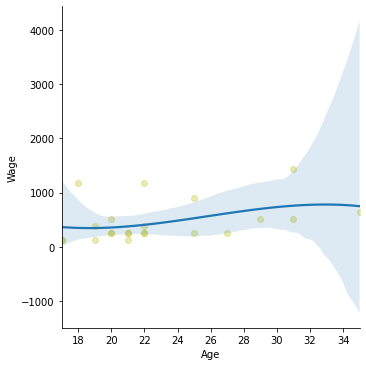

<Figure size 720x360 with 0 Axes>

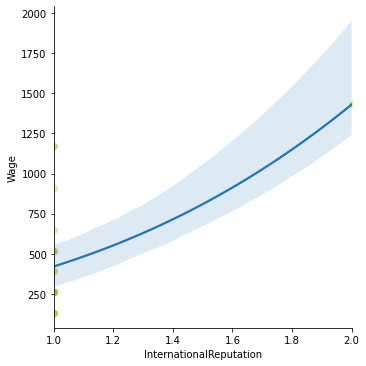

<Figure size 720x360 with 0 Axes>

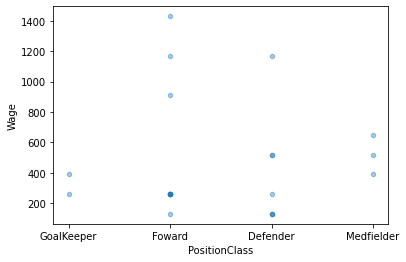

<Figure size 1440x1440 with 0 Axes>

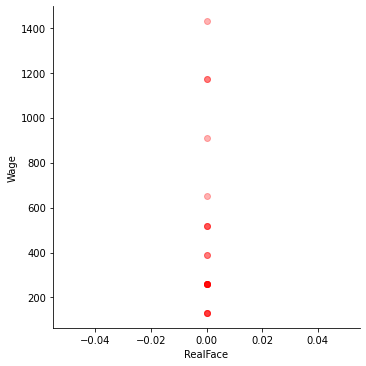

<Figure size 1440x1440 with 0 Axes>

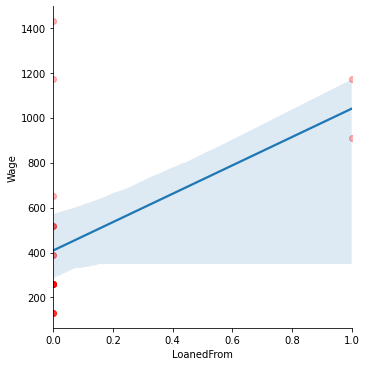

<Figure size 720x360 with 0 Axes>

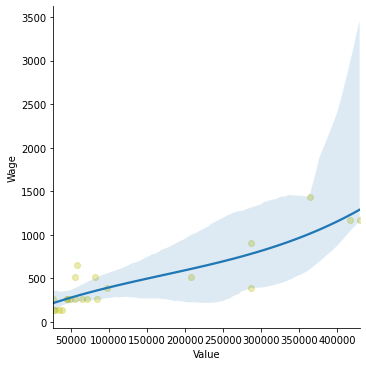

<Figure size 720x360 with 0 Axes>

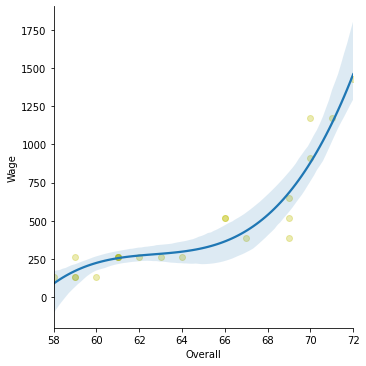

<Figure size 720x360 with 0 Axes>

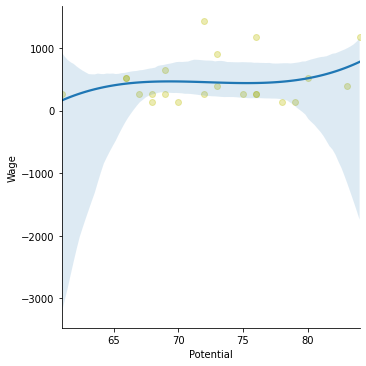

In [29]:
graph(ArgentinosJuniors)

# 중중하위 팀

# 13. Lechia Gdańsk

In [30]:
LechiaGdańsk = pd.read_pickle('./FifaClub/Lechia Gdańsk.pkl')
check(LechiaGdańsk)

Lechia Gdańsk의 인원:  22
             Wage
count   22.000000
mean   342.727273
std    225.329004
min    130.000000
25%    162.500000
50%    260.000000
75%    390.000000
max    910.000000
         Overall
count  22.000000
mean   64.136364
std     5.148236
min    51.000000
25%    62.250000
50%    65.000000
75%    67.000000
max    72.000000
       Potential
count  22.000000
mean   70.363636
std     4.006488
min    63.000000
25%    69.000000
50%    71.000000
75%    73.000000
max    80.000000
               Value
count      22.000000
mean   107220.454545
std    127281.896236
min      7800.000000
25%     46312.500000
50%     71500.000000
75%    125937.500000
max    598000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
4485,780,227562,L. Haraslín,22,Slovakia,72,80,Lechia Gdańsk,598000.0,1823,Left,1.0,3.0,4.0,2,Lean,0,LM,17.0,"Jul 7, 2015",0,2020,180.0,71,68,68,68,72,70,70,70,72,71,71,71,72,66,66,66,72,61,56,56,56,61,59,50,50,50,59,67.0,62.0,59.0,68.0,58.0,73.0,66.0,54.0,64.0,72.0,84.0,84.0,87.0,65.0,80.0,62.0,70.0,80.0,64.0,59.0,38.0,33.0,64.0,67.0,58.0,65.0,33.0,41.0,48.0,13.0,12.0,13.0,10.0,15.0,923000.0,13.301348,4.5,Medfielder,66.605751,342.727273,58.398485,260.0,55.645204,130.0,48.751973,7
5671,650,204078,R. Wolski,25,Poland,70,73,Lechia Gdańsk,286000.0,1772,Right,1.0,3.0,4.0,8,Lean,0,CAM,27.0,"Jul 4, 2016",0,2021,177.5,70,66,66,66,71,70,70,70,71,71,71,71,71,68,68,68,71,58,56,56,56,58,54,46,46,46,54,69.0,62.0,48.0,70.0,63.0,69.0,67.0,67.0,69.0,70.0,79.0,69.0,80.0,68.0,74.0,70.0,67.0,72.0,53.0,61.0,52.0,44.0,64.0,75.0,45.0,70.0,26.0,32.0,30.0,10.0,14.0,10.0,9.0,14.0,416000.0,12.563751,3.0,Medfielder,64.785096,342.727273,58.398485,260.0,55.645204,130.0,48.751973,7
4129,910,194082,Flavio Paixão,33,Portugal,71,71,Lechia Gdańsk,195000.0,1815,Right,1.0,4.0,4.0,5,Normal,0,ST,28.0,"Feb 8, 2016",0,2020,180.0,75,72,72,72,72,72,72,72,72,72,72,72,72,66,66,66,72,57,55,55,55,57,53,49,49,49,53,67.0,70.0,66.0,69.0,62.0,73.0,67.0,51.0,62.0,71.0,73.0,77.0,80.0,65.0,66.0,70.0,66.0,73.0,74.0,63.0,63.0,43.0,72.0,69.0,65.0,64.0,37.0,17.0,21.0,11.0,16.0,16.0,9.0,11.0,260000.0,12.180760,4.0,Foward,68.145429,342.727273,58.398485,260.0,55.645204,130.0,48.751973,7
5457,650,189447,A. Sobiech,28,Poland,69,69,Lechia Gdańsk,143000.0,1696,Right,2.0,3.0,2.0,6,Normal,0,ST,90.0,"Aug 9, 2018",0,2021,182.5,81,70,70,70,66,68,68,68,66,65,65,65,65,59,59,59,65,51,49,49,49,51,50,49,49,49,50,55.0,70.0,73.0,65.0,62.0,62.0,43.0,51.0,36.0,66.0,64.0,73.0,65.0,67.0,59.0,70.0,81.0,64.0,73.0,62.0,71.0,32.0,69.0,61.0,71.0,64.0,19.0,32.0,24.0,14.0,10.0,9.0,12.0,11.0,195000.0,11.870607,3.0,Foward,64.785096,342.727273,58.398485,260.0,55.645204,130.0,48.751973,7
7140,390,219700,P. Lipski,24,Poland,67,73,Lechia Gdańsk,130000.0,1667,Right,1.0,3.0,3.0,6,Lean,0,LCM,9.0,"Aug 12, 2017",0,2021,182.5,79,63,63,63,66,65,65,65,66,67,67,67,66,64,64,64,66,53,53,53,53,53,50,45,45,45,50,59.0,55.0,56.0,69.0,45.0,65.0,58.0,67.0,66.0,69.0,71.0,64.0,72.0,56.0,72.0,66.0,61.0,67.0,65.0,67.0,44.0,39.0,59.0,71.0,63.0,67.0,33.0,24.0,26.0,7.0,9.0,8.0,6.0,8.0,208000.0,11.775297,3.0,Medfielder,59.687076,342.727273,58.398485,260.0,55.645204,130.0,48.751973,7
7637,390,223307,J. Kubicki,22,Poland,67,73,Lechia Gdańsk,130000.0,1809,Right,1.0,2.0,3.0,1,Normal,0,RCM,6.0,"Jul 1, 2018",0,2021,175.0,69,63,63,63,64,65,65,65,64,66,66,66,66,68,68,68,66,68,69,69,69,68,68,68,68,68,68,49.0,58.0,60.0,70.0,49.0,59.0,54.0,38.0,64.0,67.0,74.0,75.0,66.0,70.0,75.0,59.0,62.0,86.0,70.0,59.0,78.0,66.0,52.0,64.0,43.0,71.0,58.0,68.0,63.0,9.0,15.0,6.0,13.0,10.0,208000.0,11.775297,2.0,Medfielder,59.687076,342.727273,58.398485,260.0,55.645204,130.0,48.751973,7
6329,520,208898,D. Łukasik,27,Poland,69,69,Lechia Gdańsk,113750.0,1755,Right,1.0,2.0,2.0,3,Stocky,0,CDM,35.0,"Jul 1, 2014",0,2021,175.0,73,54,54,54,59,58,58,58,59,62,62,62,62,66,66,66,62,67,69,69,69,67,66,68,68,68,66,61.0,29.0,52.0,69.0,40.0,63.0,65.0,63.0,66.0,62.0,58.0,51.0,68.0,5

<Figure size 720x360 with 0 Axes>

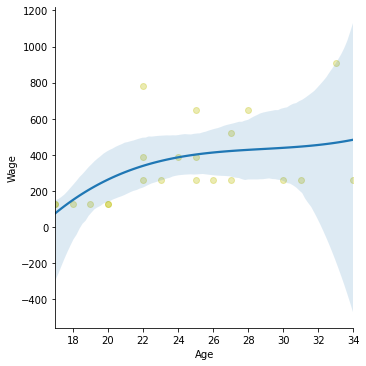

<Figure size 720x360 with 0 Axes>

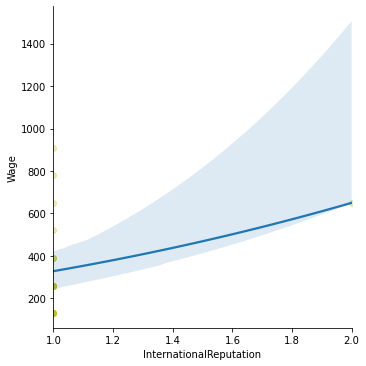

<Figure size 720x360 with 0 Axes>

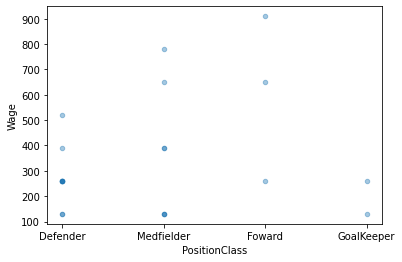

<Figure size 1440x1440 with 0 Axes>

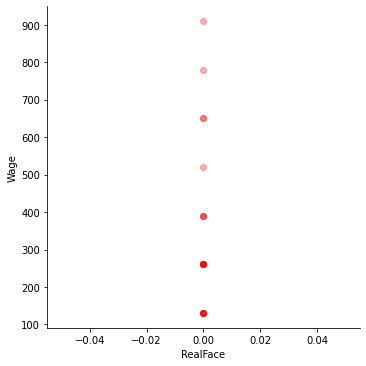

<Figure size 1440x1440 with 0 Axes>

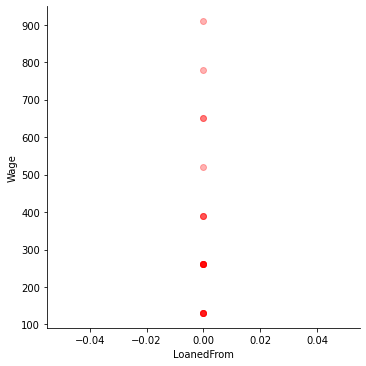

<Figure size 720x360 with 0 Axes>

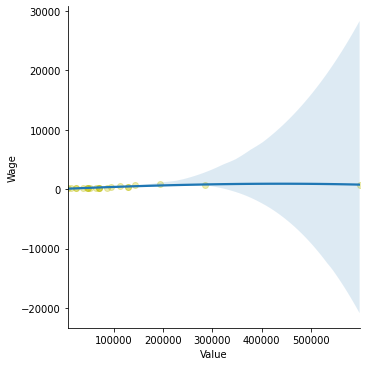

<Figure size 720x360 with 0 Axes>

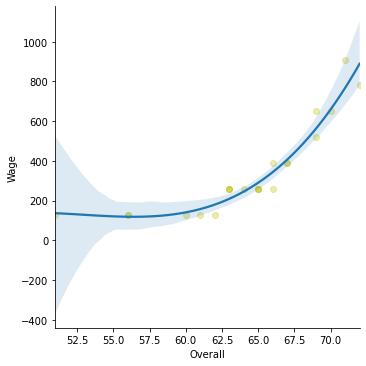

<Figure size 720x360 with 0 Axes>

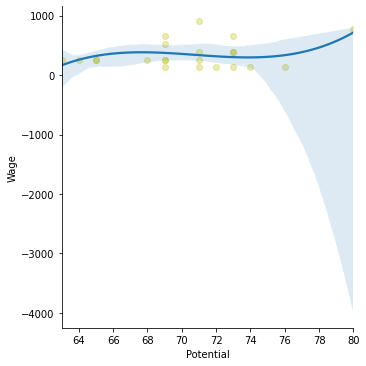

In [31]:
graph(LechiaGdańsk)

# 중하위 팀

# 14. Cracovia

In [32]:
Cracovia = pd.read_pickle('./FifaClub/Cracovia.pkl')
check(Cracovia)

Cracovia의 인원:  19
             Wage
count   19.000000
mean   218.947368
std    137.392169
min    130.000000
25%    130.000000
50%    130.000000
75%    260.000000
max    650.000000
         Overall
count  19.000000
mean   62.421053
std     4.729527
min    53.000000
25%    59.500000
50%    63.000000
75%    65.000000
max    71.000000
       Potential
count  19.000000
mean   66.947368
std     3.455651
min    62.000000
25%    64.500000
50%    66.000000
75%    70.000000
max    73.000000
               Value
count      19.000000
mean    60963.157895
std     54684.013615
min      6500.000000
25%     27950.000000
50%     45500.000000
75%     73125.000000
max    234000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
5136,650,190528,J. Gol,32,Poland,71,71,Cracovia,234000.0,1925,Right,1.0,4.0,3.0,3,Normal,0,CDM,5.0,"Aug 29, 2018",0,2020,180.0,77,68,68,68,69,69,69,69,69,70,70,70,70,71,71,71,70,70,71,71,71,70,70,69,69,69,70,64.0,63.0,69.0,72.0,51.0,70.0,58.0,63.0,69.0,68.0,68.0,60.0,73.0,71.0,63.0,66.0,65.0,82.0,73.0,61.0,71.0,70.0,68.0,70.0,62.0,71.0,57.0,67.0,69.0,11.0,12.0,14.0,11.0,14.0,312000.0,12.363081,4.0,Defender,64.785096,218.947368,53.933883,130.0,48.751973,130.0,48.751973,5
8223,390,198046,D. Dąbrowski,25,Poland,69,73,Cracovia,143000.0,1837,Right,1.0,3.0,2.0,6,Normal,0,RCM,14.0,"Jul 1, 2013",0,2019,175.0,73,64,64,64,66,66,66,66,66,67,67,67,66,69,69,69,66,68,69,69,69,68,68,67,67,67,68,59.0,49.0,58.0,70.0,51.0,62.0,53.0,55.0,68.0,69.0,76.0,63.0,72.0,71.0,70.0,70.0,85.0,62.0,61.0,62.0,65.0,74.0,61.0,67.0,51.0,70.0,54.0,71.0,65.0,6.0,6.0,6.0,16.0,9.0,208000.0,11.870607,3.0,Medfielder,59.687076,218.947368,53.933883,130.0,48.751973,130.0,48.751973,5
8389,260,219293,M. Helik,22,Poland,67,72,Cracovia,113750.0,1639,Right,1.0,3.0,2.0,6,Lean,0,CB,39.0,"Jul 1, 2017",0,2021,187.5,80,60,60,60,56,56,56,56,56,54,54,54,57,56,56,56,57,64,63,63,63,64,65,68,68,68,65,52.0,56.0,69.0,63.0,49.0,47.0,29.0,40.0,51.0,49.0,68.0,68.0,50.0,66.0,60.0,52.0,79.0,72.0,74.0,41.0,68.0,69.0,58.0,36.0,32.0,55.0,56.0,68.0,65.0,14.0,10.0,9.0,12.0,7.0,156000.0,11.641767,3.0,Defender,55.645204,218.947368,53.933883,130.0,48.751973,130.0,48.751973,5
12456,130,222329,M. Wdowiak,21,Poland,64,72,Cracovia,87750.0,1637,Right,1.0,2.0,2.0,6,Lean,0,LM,11.0,"Jan 1, 2014",0,2019,172.5,60,59,59,59,64,62,62,62,64,63,63,63,65,59,59,59,65,57,54,54,54,57,55,49,49,49,55,57.0,53.0,49.0,61.0,44.0,67.0,39.0,38.0,59.0,62.0,83.0,87.0,84.0,54.0,82.0,57.0,63.0,68.0,52.0,40.0,57.0,41.0,55.0,60.0,50.0,57.0,51.0,36.0,32.0,9.0,7.0,12.0,15.0,13.0,130000.0,11.382259,2.0,Medfielder,48.751973,218.947368,53.933883,130.0,48.751973,130.0,48.751973,5
7823,390,202754,C. Râpă,28,Romania,67,67,Cracovia,78000.0,1756,Right,1.0,3.0,2.0,2,Normal,0,RM,2.0,"Jul 31, 2018",0,2020,177.5,72,54,54,54,58,56,56,56,58,58,58,58,60,61,61,61,60,67,65,65,65,67,67,66,66,66,67,67.0,36.0,50.0,59.0,59.0,56.0,48.0,53.0,58.0,59.0,66.0,67.0,66.0,64.0,69.0,65.0,71.0,78.0,63.0,52.0,65.0,63.0,39.0,60.0,64.0,63.0,67.0,70.0,67.0,13.0,10.0,13.0,8.0,11.0,105300.0,11.264477,3.0,Medfielder,59.687076,218.947368,53.933883,130.0,48.751973,130.0,48.751973,5
9029,260,194076,Airam,30,Spain,65,65,Cracovia,68250.0,1630,Right,1.0,3.0,2.0,6,Stocky,0,ST,24.0,NaN,1,"Jun 30, 2019",177.5,78,66,66,66,63,64,64,64,63,64,64,64,62,59,59,59,62,48,48,48,48,48,46,43,43,43,46,45.0,66.0,67.0,62.0,60.0,54.0,54.0,48.0,56.0,63.0,63.0,69.0,67.0,64.0,61.0,60.0,75.0,72.0,68.0,59.0,51.0,31.0,70.0,61.0,76.0,56.0,25.0,15.0,20.0,7.0,7.0,11.0,9.0,14.0,0.0,11.130947,3.0,Foward,55.645204,218.947368,53.933883,130.0,48.751973,130.0,48.751973,5
9667,260,219561,A. Čulina,26,Croatia,64,64,Cracovia,61750.0,1625,Left,1.0,3.0,3.0,5,Lean,0,LM,7.0,"Feb 1, 2018",0,2020,180.0,77,63,63,63,66,65,65,65,66,64,64,64,65,59,59,59,65,56,53,53,53,56,53,47,47,47,53,57.0,68.0,35.0,57.0,50.0,70.0,57.0,49.0,49.0,68.0,74.0,75.0,65.0,61.0,61.0,64.0,52.0,72.0,65.0,66.0,49.0,41.0,53.0,53.0,56.0,61.0,5

<Figure size 720x360 with 0 Axes>

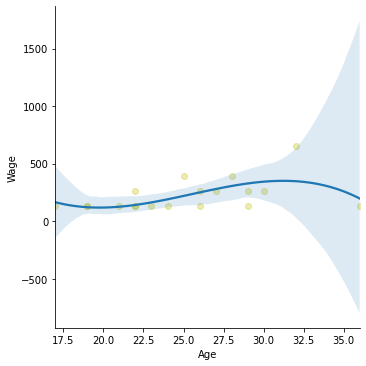

<Figure size 720x360 with 0 Axes>

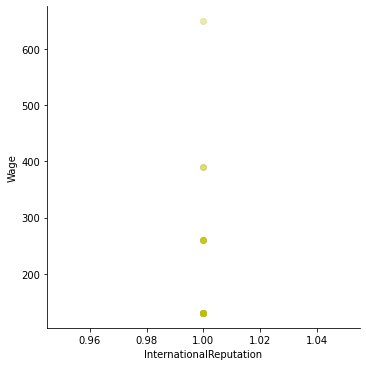

<Figure size 720x360 with 0 Axes>

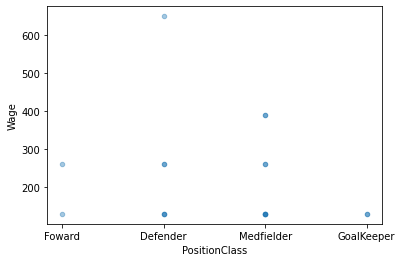

<Figure size 1440x1440 with 0 Axes>

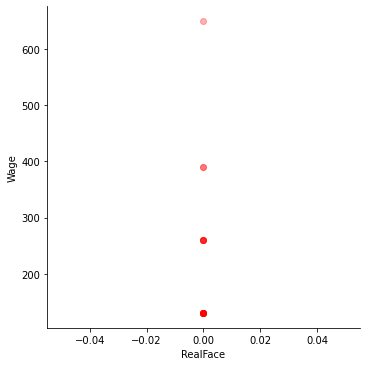

<Figure size 1440x1440 with 0 Axes>

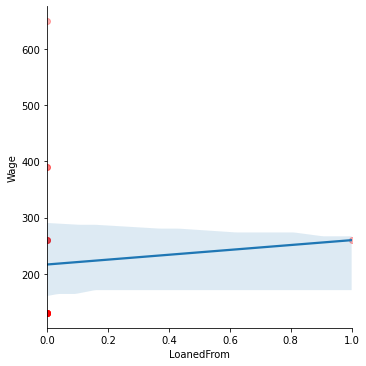

<Figure size 720x360 with 0 Axes>

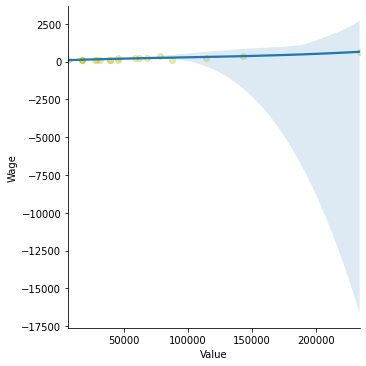

<Figure size 720x360 with 0 Axes>

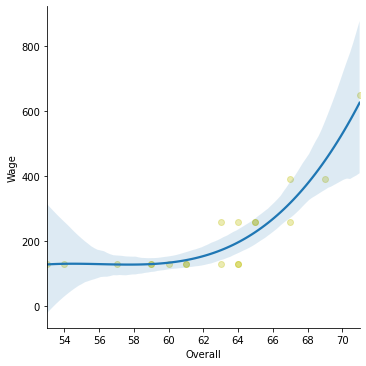

<Figure size 720x360 with 0 Axes>

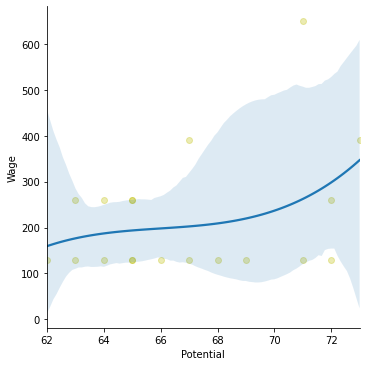

In [33]:
graph(Cracovia)

# 하위 팀

# 15. Daegu FC

In [34]:
DaeguFC = pd.read_pickle('./FifaClub/Daegu FC.pkl')
check(DaeguFC)

Daegu FC의 인원:  22
             Wage
count   22.000000
mean   183.181818
std     95.438156
min    130.000000
25%    130.000000
50%    130.000000
75%    227.500000
max    390.000000
         Overall
count  22.000000
mean   60.272727
std     4.987430
min    51.000000
25%    56.000000
50%    61.000000
75%    64.000000
max    68.000000
       Potential
count  22.000000
mean   68.000000
std     5.765249
min    57.000000
25%    65.250000
50%    68.000000
75%    71.750000
max    79.000000
               Value
count      22.000000
mean    54393.181818
std     41714.649407
min      6500.000000
25%     20800.000000
50%     40625.000000
75%     82062.500000
max    143000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
9457,260,233017,Park Han Bin,20,Korea Republic,66,78,Daegu FC,143000.0,1629,Right,1.0,3.0,2.0,4,Lean,0,CM,36.0,"Jan 1, 2016",0,2020,180.0,75,55,55,55,58,59,59,59,58,62,62,62,60,66,66,66,60,62,66,66,66,62,60,62,62,62,60,55.0,32.0,49.0,69.0,30.0,58.0,37.0,33.0,66.0,60.0,53.0,31.0,65.0,67.0,59.0,62.0,51.0,74.0,74.0,62.0,62.0,63.0,64.0,69.0,43.0,55.0,61.0,60.0,56.0,14.0,10.0,13.0,14.0,13.0,221000.0,11.870607,3.0,Medfielder,55.645204,183.181818,52.159234,130.0,48.751973,130.0,48.751973,3
6817,390,232595,Ko Seung Beom,24,Korea Republic,67,72,Daegu FC,130000.0,1726,Right,1.0,4.0,3.0,1,Normal,0,RM,4.0,NaN,1,"Dec 31, 2018",172.5,72,63,63,63,66,66,66,66,66,67,67,67,67,68,68,68,67,65,65,65,65,65,63,59,59,59,63,59.0,62.0,43.0,70.0,42.0,64.0,30.0,39.0,65.0,66.0,68.0,68.0,74.0,64.0,71.0,66.0,65.0,90.0,67.0,62.0,67.0,59.0,58.0,68.0,35.0,59.0,48.0,55.0,53.0,12.0,6.0,7.0,11.0,12.0,0.0,11.775297,4.0,Medfielder,59.687076,183.181818,52.159234,130.0,48.751973,130.0,48.751973,3
12446,130,243322,Lim Jae Hyeok,19,Korea Republic,63,79,Daegu FC,104000.0,1469,Right,1.0,3.0,2.0,2,Normal,0,ST,15.0,"Jan 1, 2018",0,2021,177.5,66,64,64,64,62,64,64,64,62,61,61,61,60,53,53,53,60,44,40,40,40,44,42,38,38,38,42,29.0,63.0,59.0,56.0,38.0,63.0,45.0,31.0,32.0,62.0,77.0,76.0,67.0,60.0,70.0,60.0,62.0,67.0,63.0,55.0,31.0,15.0,64.0,53.0,57.0,44.0,33.0,12.0,15.0,13.0,11.0,6.0,10.0,14.0,195000.0,11.552156,3.0,Foward,48.751973,183.181818,52.159234,130.0,48.751973,130.0,48.751973,3
7569,390,179947,Edgar,31,Brazil,68,68,Daegu FC,104000.0,1726,Right,1.0,3.0,3.0,6,Lean,0,ST,9.0,"Jul 10, 2018",0,2021,187.5,79,68,68,68,65,67,67,67,65,66,66,66,65,62,62,62,65,51,52,52,52,51,49,48,48,48,49,60.0,65.0,70.0,65.0,69.0,65.0,71.0,44.0,60.0,64.0,48.0,65.0,55.0,68.0,57.0,74.0,65.0,69.0,73.0,66.0,73.0,24.0,69.0,63.0,80.0,71.0,32.0,27.0,25.0,15.0,6.0,10.0,16.0,13.0,130000.0,11.552156,3.0,Foward,59.687076,183.181818,52.159234,130.0,48.751973,130.0,48.751973,3
7830,390,225733,Cesinha,28,Brazil,67,67,Daegu FC,100750.0,1593,Right,1.0,3.0,4.0,2,Lean,0,RW,11.0,"Feb 15, 2016",0,2023,175.0,74,68,68,68,69,69,69,69,69,67,67,67,67,59,59,59,67,51,46,46,46,51,48,41,41,41,48,58.0,68.0,56.0,66.0,65.0,71.0,33.0,28.0,40.0,70.0,72.0,72.0,64.0,65.0,69.0,69.0,64.0,66.0,57.0,63.0,35.0,14.0,70.0,58.0,64.0,49.0,45.0,18.0,20.0,8.0,8.0,12.0,14.0,11.0,125970.0,11.520407,3.0,Foward,59.687076,183.181818,52.159234,130.0,48.751973,130.0,48.751973,3
12773,130,233018,Kim Dae Won,21,Korea Republic,63,75,Daegu FC,84500.0,1565,Right,1.0,4.0,2.0,5,Lean,0,LW,14.0,"Jan 1, 2016",0,2020,170.0,64,65,65,65,65,65,65,65,65,63,63,63,64,54,54,54,64,48,42,42,42,48,45,40,40,40,45,59.0,59.0,61.0,54.0,50.0,62.0,40.0,34.0,34.0,64.0,80.0,75.0,68.0,62.0,69.0,67.0,75.0,64.0,59.0,55.0,59.0,17.0,67.0,62.0,60.0,52.0,34.0,12.0,15.0,10.0,6.0,9.0,11.0,12.0,122590.0,11.344519,4.0,Foward,48.751973,183.181818,52.159234,130.0,48.751973,130.0,48.751973,3
13063,130,233012,Hong Jeong Un,23,Korea Republic,64,72,Daegu FC,74750.0,1574,Right,1.0,3.0,2.0,3,Normal,0,LCB,5.0,"Jan 1, 2016",0,2020,185.0,76,52,52,52,52,54,54,54,52,56,56,56,55,61,61,61,55,60,64,64,64,60,61,65,65,65,61,42.0,22.0,68.0,66.0,29.0,43.0,28.0,28.0,63.0,57.0,63.0,55.0,49.0,59.0,59.0,55

<Figure size 720x360 with 0 Axes>

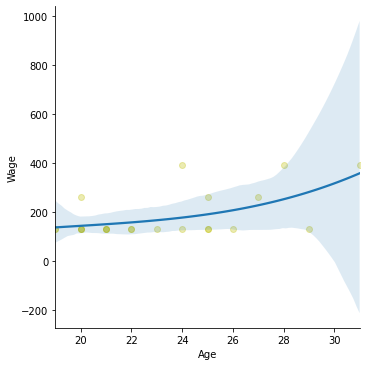

<Figure size 720x360 with 0 Axes>

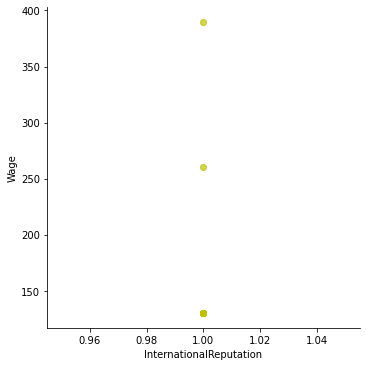

<Figure size 720x360 with 0 Axes>

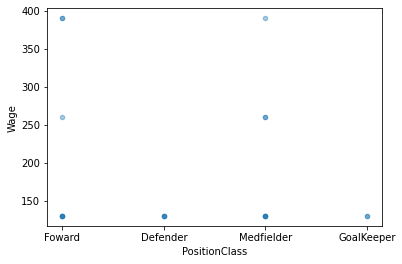

<Figure size 1440x1440 with 0 Axes>

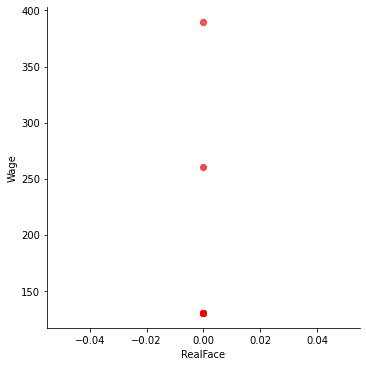

<Figure size 1440x1440 with 0 Axes>

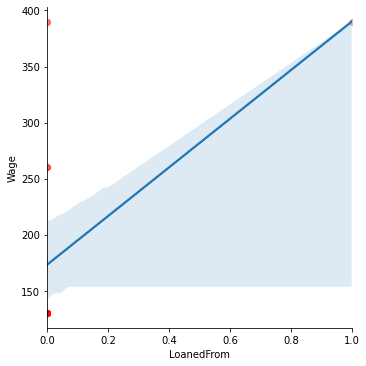

<Figure size 720x360 with 0 Axes>

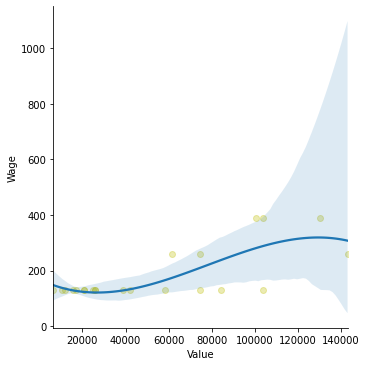

<Figure size 720x360 with 0 Axes>

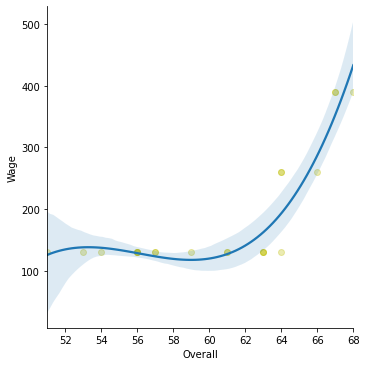

<Figure size 720x360 with 0 Axes>

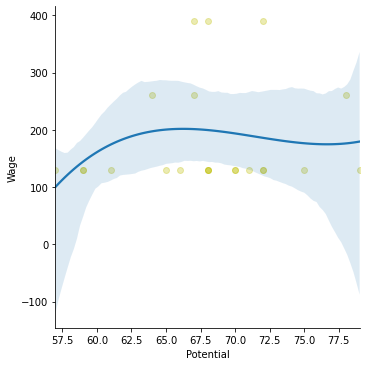

In [35]:
graph(DaeguFC)

In [36]:
DaeguFC.describe()

,Wage,ID,Age,Overall,Potential,Value,Special,InternationalReputation,WeakFoot,SkillMoves,WorkRate,RealFace,JerseyNumber,LoanedFrom,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01,22.0,2.200000e+01,22.0,2.200000e+01,22.0
mean,183.181818,230226.136364,23.272727,60.272727,68.000000,54393.181818,1465.409091,1.0,2.772727,2.090909,4.000000,0.0,24.590909,0.045455,178.068182,72.363636,52.136364,52.136364,52.136364,52.272727,52.636364,52.636364,52.636364,52.272727,52.227273,52.227273,52.227273,52.454545,49.818182,49.818182,49.818182,52.454545,47.318182,46.136364,46.136364,46.136364,47.318182,46.181818,44.636364,44.636364,44.636364,46.181818,44.272727,46.045455,50.318182,53.954545,39.909091,51.045455,36.863636,33.318182,44.136364,54.318182,61.227273,62.818182,60.045455,57.681818,62.272727,53.181818,61.090909,61.454545,62.045455,46.590909,51.909091,36.500000,53.181818,51.909091,46.318182,52.409091,39.818182,34.818182,34.590909,15.272727,13.181818,14.272727,15.454545,15.590909,71559.090909,10.564013,2.977273,51.183110,1.831818e+02,5.215923e+01,130.0,4.875197e+01,130.0,4.875197e+01,3.0
std,95.438156,14599.028625,3.411211,4.987430,5.765249,41714.649407,218.487149,0.0,0.611930,0.610159,1.825742,0.0,22.068420,0.213201,5.872242,4.904279,18.325874,18.325874,18.325874,18.424057,18.635720,18.635720,18.635720,18.424057,18.387190,18.387190,18.387190,18.259315,17.605833,17.605833,17.605833,18.259315,16.771252,17.471870,17.471870,17.471870,16.771252,16.729319,17.324756,17.324756,17.324756,16.729319,14.468955,18.258663,14.400352,13.481830,16.029464,17.434168,13.335579,10.895112,14.919771,13.083564,14.883458,16.430623,12.830311,6.585600,11.933075,16.392903,11.001771,15.747191,8.709476,16.876750,15.274969,21.867022,17.882251,12.637469,15.391359,8.617032,13.716991,19.517114,17.770117,14.293461,13.149819,11.808721,12.879394,14.721733,59630.378955,0.901322,0.778846,4.204589,5.818109e-14,7.272637e-15,0.0,1.454527e-14,0.0,1.454527e-14,0.0
min,130.000000,179947.000000,19.000000,51.000000,57.000000,6500.000000,811.000000,1.0,2.000000,1.000000,1.000000,0.0,1.000000,0.000000,167.500000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,6.000000,14.000000,22.000000,8.000000,10.000000,10.000000,13.000000,20.000000,14.000000,21.000000,16.000000,24.000000,45.000000,38.000000,20.000000,41.000000,21.000000,43.000000,6.000000,16.000000,7.000000,6.000000,24.000000,12.000000,32.000000,7.000000,12.000000,14.000000,6.000000,6.0

LogWage가 50%까지 최저주급이므로 PredictTotal의 50%인 38.732055 이하를 보자.
그 이하는 모두 같은 능력치로 만들어줘야한다.

# 하하위 팀
- 오히려 하위팀이 맞추기가 어려울 듯...

# 16. FK Haugesund

In [37]:
FKHaugesund = pd.read_pickle('./FifaClub/FK Haugesund.pkl')
check(FKHaugesund)

FK Haugesund의 인원:  14
             Wage
count   14.000000
mean   157.857143
std     55.355991
min    130.000000
25%    130.000000
50%    130.000000
75%    130.000000
max    260.000000
         Overall
count  14.000000
mean   62.142857
std     4.881002
min    53.000000
25%    59.750000
50%    64.000000
75%    65.000000
max    69.000000
       Potential
count  14.000000
mean   68.071429
std     4.714369
min    61.000000
25%    64.500000
50%    68.000000
75%    70.750000
max    77.000000
               Value
count      14.000000
mean    57757.142857
std     37626.529395
min     11700.000000
25%     30875.000000
50%     55250.000000
75%     69875.000000
max    143000.000000


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
8656,260,211021,P. Bråtveit,22,Norway,69,76,FK Haugesund,143000.0,1115,Right,1.0,3.0,1.0,6,Lean,0,GK,1.0,"Jun 1, 2013",0,2019,180.0,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,20.0,15.0,24.0,17.0,15.0,13.0,18.0,27.0,15.0,45.0,46.0,39.0,68.0,59.0,21.0,59.0,38.0,45.0,15.0,19.0,23.0,20.0,50.0,15.0,50.0,8.0,17.0,13.0,71.0,64.0,64.0,68.0,69.0,208000.0,11.870607,3.0,GoalKeeper,55.645204,157.857143,50.680053,130.0,48.751973,130.0,48.751973,2
13137,130,238263,F. Knudsen,21,Norway,65,77,FK Haugesund,110500.0,1370,Right,1.0,3.0,2.0,3,Normal,0,LCB,4.0,"Jan 30, 2017",0,2020,187.5,83,43,43,43,40,41,41,41,40,41,41,41,44,47,47,47,44,57,60,60,60,57,60,66,66,66,60,31.0,18.0,63.0,54.0,28.0,32.0,23.0,23.0,46.0,50.0,51.0,62.0,43.0,64.0,46.0,42.0,77.0,65.0,78.0,21.0,72.0,64.0,21.0,26.0,34.0,58.0,57.0,65.0,64.0,13.0,11.0,12.0,8.0,6.0,156000.0,11.612780,3.0,Defender,48.751973,157.857143,50.680053,130.0,48.751973,130.0,48.751973,2
14303,130,212099,S. Tronstad,22,Norway,65,68,FK Haugesund,87750.0,1789,Right,1.0,4.0,3.0,6,Normal,0,RCM,8.0,"Jan 14, 2016",0,2020,170.0,70,60,60,60,64,63,63,63,64,65,65,65,65,65,65,65,65,65,64,64,64,65,64,59,59,59,64,58.0,58.0,39.0,64.0,63.0,69.0,58.0,51.0,63.0,65.0,67.0,67.0,76.0,59.0,74.0,61.0,77.0,75.0,47.0,60.0,64.0,63.0,53.0,62.0,58.0,68.0,43.0,68.0,64.0,15.0,14.0,11.0,15.0,8.0,116220.0,11.382259,4.0,Medfielder,48.751973,157.857143,50.680053,130.0,48.751973,130.0,48.751973,2
13228,130,226759,B. Karamoko,23,Ivory Coast,64,71,FK Haugesund,71500.0,1355,Right,1.0,3.0,2.0,7,Normal,0,RCB,3.0,"Mar 21, 2018",0,2021,192.5,90,45,45,45,40,40,40,40,40,40,40,40,42,44,44,44,42,54,56,56,56,54,56,65,65,65,56,35.0,22.0,65.0,49.0,33.0,35.0,29.0,35.0,37.0,44.0,54.0,48.0,43.0,53.0,30.0,47.0,66.0,57.0,92.0,24.0,65.0,57.0,29.0,29.0,41.0,53.0,62.0,65.0,62.0,11.0,10.0,8.0,7.0,11.0,103740.0,11.177467,3.0,Defender,48.751973,157.857143,50.680053,130.0,48.751973,130.0,48.751973,2
13570,130,240466,M. Ćosić,24,Croatia,64,68,FK Haugesund,65000.0,1412,Left,1.0,3.0,2.0,6,Normal,0,CB,5.0,"Aug 3, 2017",0,2020,187.5,88,49,49,49,45,47,47,47,45,48,48,48,47,52,52,52,47,56,61,61,61,56,57,64,64,64,57,29.0,32.0,63.0,57.0,29.0,43.0,30.0,25.0,49.0,53.0,47.0,53.0,46.0,59.0,41.0,55.0,65.0,62.0,82.0,37.0,66.0,64.0,28.0,43.0,36.0,60.0,55.0,66.0,57.0,7.0,10.0,11.0,7.0,5.0,86190.0,11.082158,4.5,Defender,48.751973,157.857143,50.680053,130.0,48.751973,130.0,48.751973,2
14037,130,240497,I. Wadji,23,Senegal,62,71,FK Haugesund,61750.0,1551,Right,1.0,3.0,2.0,2,Lean,0,ST,17.0,"Dec 4, 2018",0,2021,172.5,74,60,60,60,63,61,61,61,63,59,59,59,61,51,51,51,61,47,41,41,41,47,45,40,40,40,45,58.0,54.0,49.0,46.0,45.0,63.0,49.0,37.0,41.0,61.0,88.0,88.0,81.0,53.0,83.0,60.0,76.0,47.0,57.0,53.0,54.0,22.0,61.0,53.0,50.0,64.0,21.0,28.0,22.0,10.0,11.0,9.0,13.0,8.0,89570.0,11.030865,3.0,Foward,48.751973,157.857143,50.680053,130.0,48.751973,130.0,48.751973,2
10219,260,182905,V. Skjerve,30,Norway,66,66,FK Haugesund,61750.0,1680,Right,1.0,3.0,2.0,6,Lean,0,CB,18.0,"Aug 7, 2008",0,2018,185.0,78,58,58,58,59,57,57,57,59,57,57,57,60,59,59,59,60,66,64,64,64,66,65,66,66,66,65,65.0,53.0,60.0,60.0,52.0,59.0,57.0,29.0,46.0,65.0,61.0,66.0,52.0,62.0,49.0,69.0,62.0,76.0,77.0,54.0,71.0,

<Figure size 720x360 with 0 Axes>

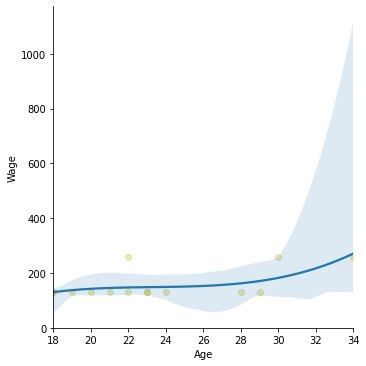

<Figure size 720x360 with 0 Axes>

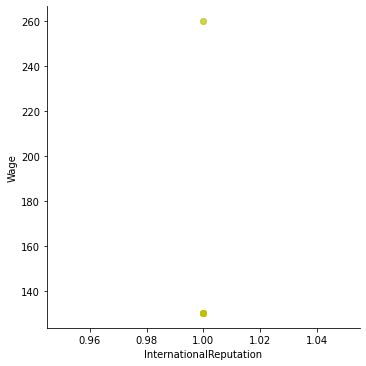

<Figure size 720x360 with 0 Axes>

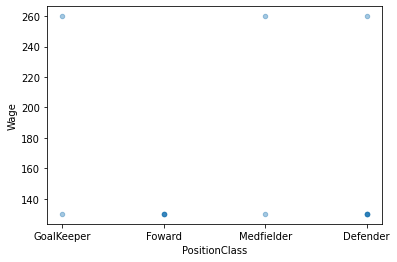

<Figure size 1440x1440 with 0 Axes>

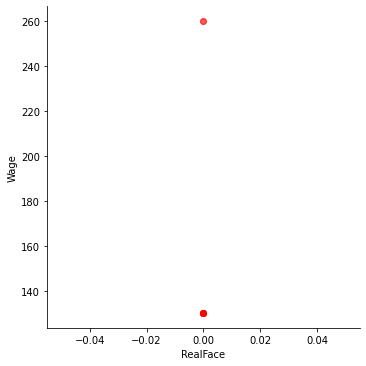

<Figure size 1440x1440 with 0 Axes>

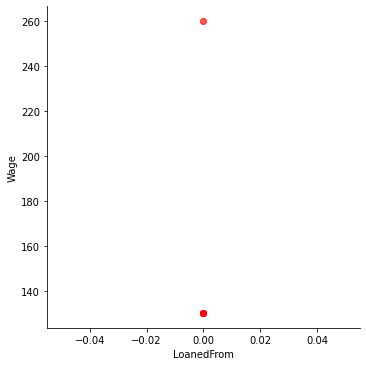

<Figure size 720x360 with 0 Axes>

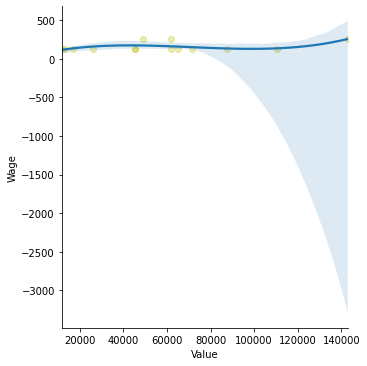

<Figure size 720x360 with 0 Axes>

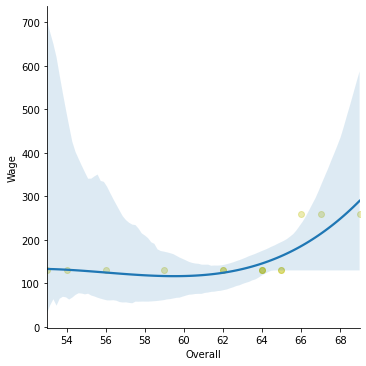

<Figure size 720x360 with 0 Axes>

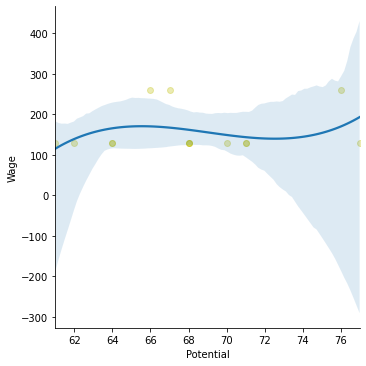

In [38]:
graph(FKHaugesund)

# 꼴찌 팀
- 분석할 것이 없다.
- 표준편차가 0 이므로 걍 모두 평균이다.

# 17. PFC CSKA Moscow

In [39]:
PFCCSKAMoscow = pd.read_pickle('./FifaClub/PFC CSKA Moscow.pkl')
check(PFCCSKAMoscow)

PFC CSKA Moscow의 인원:  21
        Wage
count   21.0
mean   130.0
std      0.0
min    130.0
25%    130.0
50%    130.0
75%    130.0
max    130.0
         Overall
count  21.000000
mean   69.238095
std     7.469302
min    58.000000
25%    63.000000
50%    69.000000
75%    75.000000
max    82.000000
       Potential
count  21.000000
mean   76.142857
std     4.596583
min    68.000000
25%    72.000000
50%    76.000000
75%    80.000000
max    84.000000
              Value
count  2.100000e+01
mean   5.514786e+05
std    6.418696e+05
min    2.080000e+04
25%    8.125000e+04
50%    2.080000e+05
75%    9.100000e+05
max    2.405000e+06


,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,ClubMinMax
12053,130,193525,Mário Fernandes,27,Russia,82,82,PFC CSKA Moscow,2405000.0,2102,Right,2.0,3.0,3.0,1,Lean,0,RB,6.0,"Jul 1, 2012",0,2022,185.0,80,74,74,74,76,76,76,76,76,76,76,76,78,78,78,78,78,82,81,81,81,82,82,81,81,81,82,76.0,56.0,76.0,78.0,52.0,77.0,66.0,39.0,74.0,79.0,79.0,85.0,79.0,80.0,61.0,71.0,84.0,87.0,75.0,58.0,77.0,78.0,76.0,73.0,53.0,76.0,83.0,82.0,84.0,12.0,13.0,14.0,13.0,12.0,5291000.0,14.693061,3.0,Defender,48.751973,130.0,48.751973,130.0,48.751973,130.0,48.751973,1
11722,130,187735,A. Dzagoev,28,Russia,79,79,PFC CSKA Moscow,1625000.0,2115,Right,3.0,3.0,4.0,2,Normal,1,RDM,10.0,"Jan 1, 2008",0,2019,175.0,75,77,77,77,79,79,79,79,79,80,80,80,80,80,80,80,80,77,77,77,77,77,76,73,73,73,76,75.0,70.0,67.0,79.0,72.0,78.0,74.0,75.0,76.0,81.0,81.0,69.0,71.0,80.0,72.0,76.0,73.0,74.0,66.0,71.0,69.0,71.0,76.0,81.0,65.0,78.0,69.0,71.0,70.0,11.0,16.0,12.0,14.0,10.0,3575000.0,14.301019,3.0,Defender,48.751973,130.0,48.751973,130.0,48.751973,130.0,48.751973,1
14004,130,241095,N. Vlašić,20,Croatia,75,84,PFC CSKA Moscow,1365000.0,1886,Right,1.0,4.0,3.0,6,Normal,0,LCM,8.0,"Aug 31, 2017",0,2022,175.0,79,71,71,71,76,75,75,75,76,75,75,75,75,71,71,71,75,63,61,61,61,63,60,55,55,55,60,69.0,68.0,51.0,75.0,66.0,83.0,62.0,58.0,67.0,76.0,77.0,80.0,78.0,73.0,74.0,73.0,55.0,71.0,66.0,69.0,63.0,26.0,64.0,72.0,66.0,66.0,54.0,55.0,37.0,6.0,14.0,15.0,9.0,14.0,3276000.0,14.126666,4.0,Medfielder,48.751973,130.0,48.751973,130.0,48.751973,130.0,48.751973,1
13674,130,148119,I. Akinfeev,32,Russia,80,80,PFC CSKA Moscow,1105000.0,1208,Right,3.0,3.0,1.0,6,Normal,1,GK,1.0,"Jan 1, 2002",0,2022,182.5,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,13.0,18.0,23.0,10.0,15.0,19.0,13.0,22.0,22.0,51.0,50.0,53.0,71.0,45.0,24.0,62.0,35.0,72.0,13.0,24.0,17.0,11.0,59.0,10.0,67.0,18.0,13.0,13.0,77.0,72.0,78.0,82.0,84.0,2431000.0,13.915357,3.0,GoalKeeper,48.751973,130.0,48.751973,130.0,48.751973,130.0,48.751973,1
11411,130,188484,A. Hernández,27,Uruguay,75,75,PFC CSKA Moscow,910000.0,1814,Left,2.0,4.0,3.0,8,Lean,1,LS,11.0,"Aug 1, 2018",0,2021,182.5,73,76,76,76,72,74,74,74,72,71,71,71,70,63,63,63,70,53,50,50,50,53,51,48,48,48,51,46.0,75.0,74.0,67.0,72.0,72.0,75.0,60.0,47.0,72.0,85.0,79.0,81.0,74.0,68.0,73.0,70.0,67.0,73.0,71.0,59.0,24.0,77.0,57.0,76.0,74.0,26.0,29.0,22.0,14.0,6.0,8.0,6.0,9.0,2002000.0,13.721201,5.5,Foward,48.751973,130.0,48.751973,130.0,48.751973,130.0,48.751973,1
11575,130,187517,V. Vasin,29,Russia,77,77,PFC CSKA Moscow,910000.0,1754,Right,1.0,3.0,2.0,6,Normal,0,CB,5.0,"Jan 1, 2011",0,2019,190.0,83,55,55,55,50,51,51,51,50,52,52,52,54,59,59,59,54,68,72,72,72,68,71,77,77,77,71,51.0,30.0,84.0,62.0,38.0,33.0,72.0,62.0,64.0,63.0,69.0,66.0,37.0,69.0,43.0,71.0,79.0,74.0,86.0,36.0,77.0,78.0,25.0,51.0,68.0,66.0,76.0,75.0,72.0,11.0,6.0,6.0,13.0,7.0,2002000.0,13.721201,3.0,Defender,48.751973,130.0,48.751973,130.0,48.751973,130.0,48.751973,1
10462,130,192087,G. Schennikov,27,Russia,75,76,PFC CSKA Moscow,780000.0,1971,Left,1.0,3.0,3.0,6,Lean,0,LWB,42.0,"Jan 1, 2008",0,2023,177.5,75,65,65,65,70,68,68,68,70,69,69,69,72,71,71,71,72,76,74,74,74,76,76,73,73,73,76,72.0,55.0,66.0,71.0,43.0,67.0,67.0,62.0,69.0,72.0,84.0,76.0,79.0,70.0,72.0,53.0,72.0,84.0,63

<Figure size 720x360 with 0 Axes>

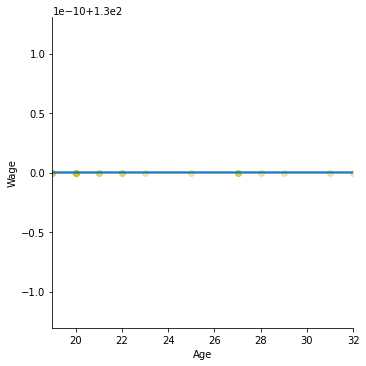

<Figure size 720x360 with 0 Axes>

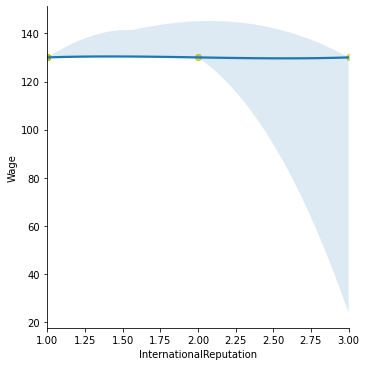

<Figure size 720x360 with 0 Axes>

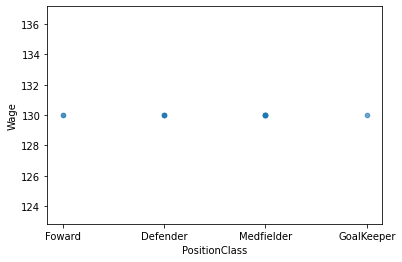

<Figure size 1440x1440 with 0 Axes>

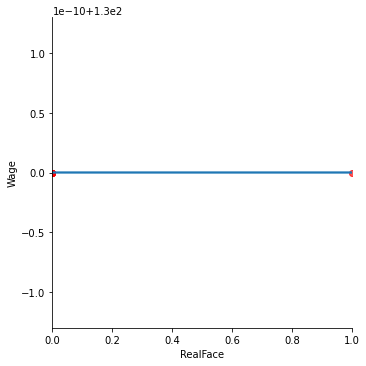

<Figure size 1440x1440 with 0 Axes>

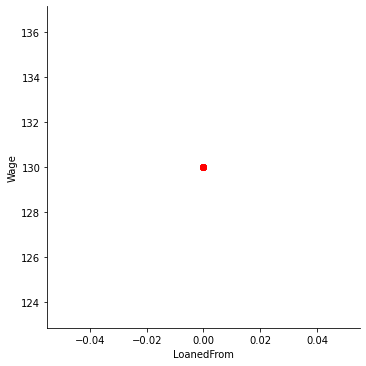

<Figure size 720x360 with 0 Axes>

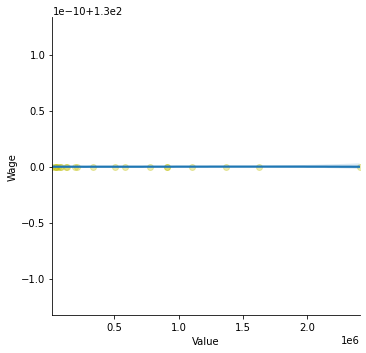

<Figure size 720x360 with 0 Axes>

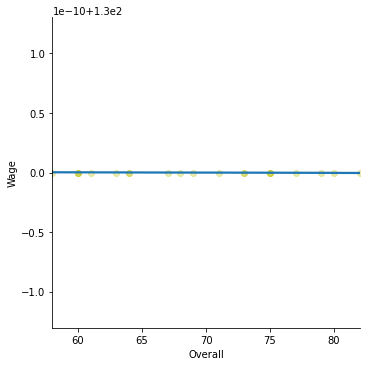

<Figure size 720x360 with 0 Axes>

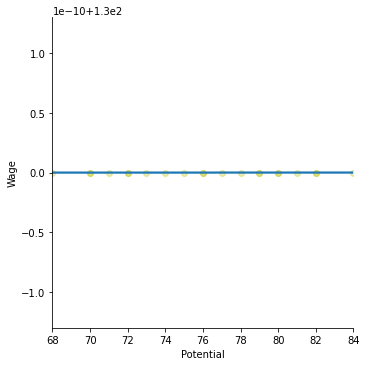

In [40]:
graph(PFCCSKAMoscow)